# The Retrospective

---

## The brief

> **Client:** Rolling Beats Magazine (music publication)
>
> **Your role:** Data Journalist
>
> **Context:** Rolling Beats is preparing their "25 Years of Pop" retrospective issue. The editorial team wants data-driven stories that reveal how popular music has evolved since 2000. They're looking for surprising trends, cultural shifts, and compelling visualizations that tell the story of modern pop.
>
> You have access to 25 years of Billboard Hot 100 chart data (2000-2024), combined with Spotify's audio analysis of each track.
>
> **Your task:** Explore 25 years of chart data and uncover the stories hidden within. What trends emerge? What has changed, and what has stayed the same? Find insights that would make readers say "I never knew that."

---

## Understanding the data

This dataset spans an incredible period in music history:

- **2000**: The Napster era. CD sales at their peak.
- **2003-2010**: The iTunes revolution. Digital singles take over.
- **2010-2015**: YouTube becomes a music platform. Viral hits emerge.
- **2015-present**: Streaming dominance. Billboard changes its methodology to include streams.

### What the Billboard Hot 100 measures

The Hot 100 combines:
- **Radio airplay** (still matters!)
- **Streaming** (Spotify, Apple Music, YouTube, etc.)
- **Sales** (downloads, physical)

The formula has changed over time, which creates interesting dynamics – a streaming-era hit might look different from a radio-era hit.

## A note on data quality

- **Release dates vary**: Older songs have less precise dates (just year). Newer songs have full dates.
- **Catalog songs re-chart**: Old songs can re-enter the chart years later (TikTok effect, movie placements)
- **Christmas songs**: They return every year! December data is always unusual.
- **Methodology changes**: Billboard changed how it counts streams in 2013, 2018, and 2020.

**Tip for journalists:** Be careful about claiming trends – make sure the pattern isn't just an artifact of methodology changes!

---

## Suggested starting points

Think like a journalist. What stories would surprise readers?

- How has the **"sound" of popular music changed**? Track audio features across the decades.
- Has music gotten **more or less explicit** over time? More or less acoustic?
- Which artists **dominated each era**? Who had the longest chart presence?
- Are there **seasonal patterns** in the charts? (Christmas songs, summer anthems?)
- How long do **#1 hits** typically stay at the top? Has this changed?
- What's the average **"age" of a hit song**? Do old songs still chart? (Hint: compare release dates to chart dates)
- Have songs gotten **shorter or longer**? What about tempo – faster or slower?

**THESE ARE NOT QUESTIONS THAT I EXPECT YOU TO ANSWER, JUST IDEAS TO GET YOU STARTED.**

---

## Loading the data

In [1]:
!pip install google 
!pip install google-cloud
!pip install google-cloud-bigquery

In [2]:
!pip install db-dtypes

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.cloud.bigquery import Client
from google.auth import load_credentials_from_file

In [5]:
credentials, project = load_credentials_from_file("bigquery-access-key.json")

In [6]:
client = Client(
    project=project, credentials=credentials
)

In [7]:
# Test we did in class below 

# List of all datasets
datasets = [
    "tracks", 
    "artists", 
    "audio_features", 
    "chart_positions", 
    "tracks_artists_mapping"
]

# Selecting one of them and constructing a query
# to the database
dataset = datasets[0]
    
query = f"""
SELECT *
FROM `hyper-python-2025.assessment.{dataset}`
"""

# Running the query and storing the results as a df
job = client.query(query)
df = job.to_dataframe()
df.head()

/opt/anaconda3/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,track_id,name,duration_ms,release_date,album_type,explicit
0,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False
1,4T7fVN4ZOFE3JoGyaxZL6O,Falls Apart,255160,1900-01-01,album,False
2,5CMVGP24paZIukljDj0iWc,Jingle Bells (with The Ken Lane Singers),156666,1945,compilation,False
3,04vLj9QUXoKdRlsp3gkURo,Mele Kalikimaka (Merry Christmas),175333,1945-01-01,compilation,False
4,25leEEaz1gIpp7o21Fqyjo,Here Comes Santa Claus (Right Down Santa Claus...,150266,1947,album,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11070 entries, 0 to 11069
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      11070 non-null  object 
 1   name          11070 non-null  object 
 2   duration_ms   11070 non-null  Int64  
 3   release_date  11070 non-null  object 
 4   album_type    11070 non-null  object 
 5   explicit      11070 non-null  boolean
dtypes: Int64(1), boolean(1), object(4)
memory usage: 465.0+ KB


## Creating DataFrames - Making a function

In [816]:
# Making a function for creating DataFrames for every table 
def datasets_to_dfs(client, datasets):
    dfs = {}

    for dataset in datasets:
        query = f"""
        SELECT *
        FROM `hyper-python-2025.assessment.{dataset}`
        """
        job = client.query(query)
        dfs[dataset] = job.to_dataframe()

    return dfs


In [817]:
# Creating my DataFrames 
dfs = datasets_to_dfs(client, datasets)

tracks = dfs["tracks"]
artists = dfs["artists"]
audio_features = dfs['audio_features']
chart_positions = dfs['chart_positions']
tracks_artists_mapping = dfs['tracks_artists_mapping']

/opt/anaconda3/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


## Your analysis

*Add cells below to explore the data and create visualizations. Structure it like a magazine feature – with clear narrative sections and compelling visuals that tell a story.*

# Exploring, Transforming and Data Cleaning

In [840]:
tracks.head()

,track_id,name,duration_ms,release_date,album_type,explicit
0,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False
1,4T7fVN4ZOFE3JoGyaxZL6O,Falls Apart,255160,1900-01-01,album,False
2,5CMVGP24paZIukljDj0iWc,Jingle Bells (with The Ken Lane Singers),156666,1945,compilation,False
3,04vLj9QUXoKdRlsp3gkURo,Mele Kalikimaka (Merry Christmas),175333,1945-01-01,compilation,False
4,25leEEaz1gIpp7o21Fqyjo,Here Comes Santa Claus (Right Down Santa Claus...,150266,1947,album,False


In [841]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11070 entries, 0 to 11069
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      11070 non-null  object 
 1   name          11070 non-null  object 
 2   duration_ms   11070 non-null  Int64  
 3   release_date  11070 non-null  object 
 4   album_type    11070 non-null  object 
 5   explicit      11070 non-null  boolean
dtypes: Int64(1), boolean(1), object(4)
memory usage: 465.0+ KB


In [842]:
tracks.describe(include='object')

,track_id,name,release_date,album_type
count,11070,11070,11070,11070
unique,10783,10151,2440,3
top,7uKcScNXuO3MWw6LowBjW1,You,2013-01-01,album
freq,9,10,153,8977


In [843]:
# Checking for identical rows 
tracks[tracks.duplicated(keep=False)]

,track_id,name,duration_ms,release_date,album_type,explicit
6,4HEOgBHRCExyYVeTyrXsnL,Jingle Bells - Remastered 1999,120693,1957-09,album,False
7,4HEOgBHRCExyYVeTyrXsnL,Jingle Bells - Remastered 1999,120693,1957-09,album,False
10,2uFaJJtFpPDc5Pa95XzTvg,Let It Snow! Let It Snow! Let It Snow!,117146,1959-01-01,album,False
11,2uFaJJtFpPDc5Pa95XzTvg,Let It Snow! Let It Snow! Let It Snow!,117146,1959-01-01,album,False
14,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False
...,...,...,...,...,...,...
11027,1eroCliWpJrEu1V7VSObcO,Circadian Rhythm,126356,2024-08-30,single,True
11029,1eroCliWpJrEu1V7VSObcO,Circadian Rhythm,126356,2024-08-30,single,True
11030,1eroCliWpJrEu1V7VSObcO,Circadian Rhythm,126356,2024-08-30,single,True
11036,3lUYO6zvXI88sNDpyKvIJ2,Or What,199165,2024-09-06,single,True


In [844]:
# I don't see why I would need one or more identical row per track, one per track should suffice for my analysis and merging so I will remove the duplicate rows 
tracks = tracks.drop_duplicates()

In [845]:
chart_positions.head()

,chart_week,list_position,track_id
0,2021-07-10,42,000TJlEJQ3nafsm1hBWpoj
1,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H
2,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H
3,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H
4,2003-07-12,66,003FTlCpBTM4eSqYSWPv4H


In [846]:
chart_positions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129305 entries, 0 to 129304
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   chart_week     129305 non-null  dbdate
 1   list_position  129305 non-null  Int64 
 2   track_id       129305 non-null  object
dtypes: Int64(1), dbdate(1), object(1)
memory usage: 3.1+ MB


In [847]:
chart_positions.describe(include='object')

,track_id
count,129305
unique,10783
top,7uKcScNXuO3MWw6LowBjW1
freq,109


In [848]:
# checking for identical rows 
chart_positions[chart_positions.duplicated(keep=False)]

,chart_week,list_position,track_id


In [849]:
artists.head()

,artist_id,name,popularity,followers
0,13UwRaADQI0yTqjPBDkk6d,J-Shin (Featuring LaTocha Scott of Xscape),0,253
1,2LmsYeN3MzzZ9zhuZhNyqO,A*Teens,0,10
2,5Q25oFANw7zA3kD2DPaJ8D,The 2000s Karaoke Band,0,26
3,7u7ORV6MVjId1jfJwMdakL,2000s Karaoke Band,0,27
4,0LyfQWJT6nXafLPZqxe9Of,Various Artists,0,2542450


In [850]:
# checking for duplicate rows 
artists[artists.duplicated(keep=False)]

,artist_id,name,popularity,followers


In [851]:
tracks_artists_mapping.head()

,track_id,artist_id
0,00FQb4jTyendYWaN8pK0wa,4zmKGsrXjLmljb5fTaBTot
1,00FQb4jTyendYWaN8pK0wa,6GGtHZgBycCgGBUhZo81xe
2,00FQb4jTyendYWaN8pK0wa,22DH8NChecsgPxDjA4pqer
3,00FQb4jTyendYWaN8pK0wa,7JVNRVPeXFAOdMrxOHNjVv
4,00FQb4jTyendYWaN8pK0wa,24jvD83UgLmrdGjhWTFslY


In [852]:
tracks_artists_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15048 entries, 0 to 15047
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   track_id   15048 non-null  object
 1   artist_id  15048 non-null  object
dtypes: object(2)
memory usage: 235.3+ KB


In [853]:
audio_features.head(10)

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
7,3lZpvPprN56RWqDqrKy9vl,0.0000,0.5320,3.0,-7.447,1.0,0.0000,0.976000,0.000000,0.0000,0.0000,0.000,0.0
8,0u1Sp4e3Phbbg9U215CMBe,0.0746,0.0420,2.0,-25.752,1.0,0.0408,0.925000,0.615000,0.0484,0.0347,77.810,4.0
9,4ecrWAB11dwNLB46lqeRHF,0.0772,0.0124,0.0,-33.833,1.0,0.0435,0.951000,0.749000,0.0748,0.0446,81.059,4.0
10,64zMg4hZVgyIRuZimF7olj,0.1090,0.3700,0.0,-8.160,0.0,0.0312,0.914000,0.000451,0.1230,0.0628,84.080,4.0
11,6nnacTL5on2aVsRhVDNUSo,0.1130,0.9510,0.0,-4.743,0.0,0.1290,0.001760,0.007180,0.3340,0.1390,200.024,4.0
12,1lbjDy6IIerHFGZWKG0hno,0.1300,0.0986,6.0,-25.793,0.0,0.0402,0.958000,0.785000,0.1300,0.0904,87.797,3.0
13,0UpdZpqyGKwz3GRU1DvpGM,0.1370,0.2950,4.0,-6.814,1.0,0.0401,0.370000,0.000005,0.1380,0.1580,80.477,1.0
14,1y3r6RXiJZNBV1EI0NggpS,0.1440,0.5410,0.0,-7.076,1.0,0.0380,0.278000,0.000010,0.1010,0.0899,79.262,3.0
15,79iXlNKJEGyQRlPwlUKwh8,0.1500,0.5250,2.0,-9.400,1.0,0.0549,0.000101,0.373000,0.1990,0.0378,180.107,4.0
16,1ekYzXIWgelL4Ai3pXMOfe,0.1550,0.3240,2.0,-10.150,1.0,0.0393,0.836000,0.063700,0.0785,0.0776,177.201,3.0


In [854]:
audio_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10776 entries, 7 to 10782
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          10776 non-null  object 
 1   danceability      10776 non-null  float64
 2   energy            10776 non-null  float64
 3   key               10776 non-null  float64
 4   loudness          10776 non-null  float64
 5   mode              10776 non-null  float64
 6   speechiness       10776 non-null  float64
 7   acousticness      10776 non-null  float64
 8   instrumentalness  10776 non-null  float64
 9   liveness          10776 non-null  float64
 10  valence           10776 non-null  float64
 11  tempo             10776 non-null  float64
 12  time_signature    10776 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.2+ MB


In [855]:
audio_features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000
mean,0.641901,0.663968,5.190423,-6.258711,0.647921,0.114843,0.186692,0.020238,0.182950,0.495219,122.563080,3.960375
std,0.150577,0.173540,3.609825,2.467240,0.477641,0.113855,0.227321,0.115044,0.138954,0.225929,29.702706,0.313069
min,0.000000,0.003430,0.000000,-33.833000,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.540000,0.552000,2.000000,-7.421250,0.000000,0.036900,0.021475,0.000000,0.097200,0.316000,97.925750,4.000000
50%,0.647000,0.679000,5.000000,-5.843500,1.000000,0.059700,0.088300,0.000000,0.127500,0.491000,121.991500,4.000000
75%,0.752000,0.798000,8.000000,-4.619000,1.000000,0.155000,0.266250,0.000023,0.229000,0.669000,143.187250,4.000000
max,0.980000,0.999000,11.000000,0.175000,1.000000,0.951000,0.995000,0.985000,0.992000,0.976000,213.737000,5.000000


In [856]:
audio_features.isnull().sum() # seven null rows in this table

# since they have null valus in every column, I do not see how I can use any of these seven rows for my analysis. 
# I will go ahead and drop the seven rows that are filled with only null values. 

audio_features = audio_features.dropna()


In [857]:
# Checking that it worked, and it did. 
audio_features.isna().sum()

track_id            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [858]:
audio_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10776 entries, 7 to 10782
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          10776 non-null  object 
 1   danceability      10776 non-null  float64
 2   energy            10776 non-null  float64
 3   key               10776 non-null  float64
 4   loudness          10776 non-null  float64
 5   mode              10776 non-null  float64
 6   speechiness       10776 non-null  float64
 7   acousticness      10776 non-null  float64
 8   instrumentalness  10776 non-null  float64
 9   liveness          10776 non-null  float64
 10  valence           10776 non-null  float64
 11  tempo             10776 non-null  float64
 12  time_signature    10776 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.2+ MB


In [859]:
# checking for duplicate rows 
audio_features[audio_features.duplicated(keep=False)]

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


### Merging

In [860]:
audio_merge = tracks.merge(audio_features, on='track_id')

In [861]:
audio_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          10776 non-null  object 
 1   name              10776 non-null  object 
 2   duration_ms       10776 non-null  Int64  
 3   release_date      10776 non-null  object 
 4   album_type        10776 non-null  object 
 5   explicit          10776 non-null  boolean
 6   danceability      10776 non-null  float64
 7   energy            10776 non-null  float64
 8   key               10776 non-null  float64
 9   loudness          10776 non-null  float64
 10  mode              10776 non-null  float64
 11  speechiness       10776 non-null  float64
 12  acousticness      10776 non-null  float64
 13  instrumentalness  10776 non-null  float64
 14  liveness          10776 non-null  float64
 15  valence           10776 non-null  float64
 16  tempo             10776 non-null  float6

## Continued cleaning and merging - Fixing dates and some release dates for year 1900

In [863]:
# Changing the release date to datetime object
# HEADS UP - this adds month and day as 01-01 to every entry that only had year as release date. 
audio_merge['release_date'] = pd.to_datetime(audio_merge['release_date'], format='mixed')


In [864]:
audio_merge['release_date'].value_counts().sort_index() 
#Two songs are released in 1990. I will take a look at these seperatly to see if that seems correct.
# I will also make a new column with only release year, as that will work well for my analysis.

release_date
1900-01-01    2
1945-01-01    2
1947-01-01    2
1957-09-01    1
1957-10-15    1
             ..
2024-10-03    1
2024-10-04    2
2024-10-08    2
2024-10-11    4
2024-10-13    2
Name: count, Length: 2415, dtype: int64

In [865]:
# New column with only year
audio_merge['release_year'] = audio_merge['release_date'].dt.year

#checking that it worked
audio_merge['release_year'].value_counts()

release_year
2021    671
2023    668
2020    663
2022    615
2018    600
       ... 
1966      1
1965      1
1962      1
1983      1
1977      1
Name: count, Length: 61, dtype: int64

In [866]:
audio_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   track_id          10776 non-null  object        
 1   name              10776 non-null  object        
 2   duration_ms       10776 non-null  Int64         
 3   release_date      10776 non-null  datetime64[ns]
 4   album_type        10776 non-null  object        
 5   explicit          10776 non-null  boolean       
 6   danceability      10776 non-null  float64       
 7   energy            10776 non-null  float64       
 8   key               10776 non-null  float64       
 9   loudness          10776 non-null  float64       
 10  mode              10776 non-null  float64       
 11  speechiness       10776 non-null  float64       
 12  acousticness      10776 non-null  float64       
 13  instrumentalness  10776 non-null  float64       
 14  liveness          1077

In [867]:
# checking the 1990 entries 
audio_merge[audio_merge['release_year'] == 1900]

,track_id,name,duration_ms,release_date,album_type,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False,0.745,0.682,1.0,-4.390,0.0,0.0287,0.01050,0.08360,0.210,0.939,110.855,4.0,1900
1,4T7fVN4ZOFE3JoGyaxZL6O,Falls Apart,255160,1900-01-01,album,False,0.562,0.897,4.0,-3.974,1.0,0.0306,0.00321,0.00623,0.248,0.600,103.453,4.0,1900


In [868]:
# First I will fix the headings on the merge table since I've seen from Slack that it has an unintended error 
tracks_artists_mapping = tracks_artists_mapping.rename(columns={
    "track_id": "artist_id",
    "artist_id": "track_id"
})

In [869]:
# Let's investigate the 1900 song. 
# I need artist name and track name, so tracks and artists need to be merged 

artist_audio_merge = tracks_artists_mapping.merge(artists, on="artist_id").merge(audio_merge, on="track_id")

# Changing the duplicated column headers
artist_audio_merge = artist_audio_merge.rename(columns={
    "name_x": "artist_name",
    "name_y": "track_name"
})

In [870]:
artist_audio_merge[artist_audio_merge['release_year'] == 1900]

,artist_id,track_id,artist_name,popularity,followers,track_name,duration_ms,release_date,album_type,explicit,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
9722,4uN3DsfENc7dp0OLO0FEIb,6zeDYmP3ARpURvpK29Q09P,Sugar Ray,63,988880,Someday,242800,1900-01-01,album,False,...,-4.390,0.0,0.0287,0.01050,0.08360,0.210,0.939,110.855,4.0,1900
9723,4uN3DsfENc7dp0OLO0FEIb,4T7fVN4ZOFE3JoGyaxZL6O,Sugar Ray,63,988880,Falls Apart,255160,1900-01-01,album,False,...,-3.974,1.0,0.0306,0.00321,0.00623,0.248,0.600,103.453,4.0,1900


In [871]:
# Both songs are released by the band Sugar Ray
# A quick Google search shows that Some Day was released on June 1 1999, and Falls Apart was released on May 12 1999. I will fix this. 

# Changing the dates in the original tracks Data Frame
tracks.loc[tracks['track_id'] == "6zeDYmP3ARpURvpK29Q09P",'release_date'] = "1999-06-01" # Someday
tracks.loc[tracks['track_id'] == "4T7fVN4ZOFE3JoGyaxZL6O",'release_date'] = "1999-05-12" # Falls Apart

#Rerunning my merges and datatime object code from before to get correct data and release dates 
audio_merge = tracks.merge(audio_features, on='track_id')
#Changing to date time object
audio_merge['release_date'] = pd.to_datetime(audio_merge['release_date'], format='mixed')
# New column with only year
audio_merge['release_year'] = audio_merge['release_date'].dt.year



tracks_artist_audio = tracks_artists_mapping.merge(artists, on="artist_id").merge(audio_merge, on="track_id")

# Changing the duplicated column headers
tracks_artist_audio = tracks_artist_audio.rename(columns={
    "name_x": "artist_name",
    "name_y": "track_name"
})

In [872]:
#checking that it worked, and it did. They now have correct release dates and years. 
tracks_artist_audio.loc[tracks_artist_audio['track_id'].isin(["6zeDYmP3ARpURvpK29Q09P", "4T7fVN4ZOFE3JoGyaxZL6O"])]


,artist_id,track_id,artist_name,popularity,followers,track_name,duration_ms,release_date,album_type,explicit,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
9722,4uN3DsfENc7dp0OLO0FEIb,6zeDYmP3ARpURvpK29Q09P,Sugar Ray,63,988880,Someday,242800,1999-06-01,album,False,...,-4.390,0.0,0.0287,0.01050,0.08360,0.210,0.939,110.855,4.0,1999
9723,4uN3DsfENc7dp0OLO0FEIb,4T7fVN4ZOFE3JoGyaxZL6O,Sugar Ray,63,988880,Falls Apart,255160,1999-05-12,album,False,...,-3.974,1.0,0.0306,0.00321,0.00623,0.248,0.600,103.453,4.0,1999


## Duplicate track IDs

In [874]:
# We also have track IDs that show up multiple times 
tracks_artist_audio['track_id'].value_counts()

track_id
1EiwZsCTu8cGSRdog30oYY    16
139tsLjqIp7RJo22lAaTPs    14
61FfiL8hYFXh5qe7tuBsar    11
4cHvNUjD8pzO8qNR8P5Gwl    10
5WnfnSpuNEGXyEt78PBA6d    10
                          ..
03UrZgTINDqvnUMbbIMhql     1
09keT5ocFhEd5W5HidiUNq     1
5NxxixRIBePmP5iNl9lPOt     1
1OG1NoKpZZLrMqMYCk9m84     1
5ztSiJBrCxd4Q0s0yc3tAV     1
Name: count, Length: 10776, dtype: int64

In [875]:
tracks_artist_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15031 entries, 0 to 15030
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artist_id         15031 non-null  object        
 1   track_id          15031 non-null  object        
 2   artist_name       15031 non-null  object        
 3   popularity        15031 non-null  Int64         
 4   followers         15031 non-null  Int64         
 5   track_name        15031 non-null  object        
 6   duration_ms       15031 non-null  Int64         
 7   release_date      15031 non-null  datetime64[ns]
 8   album_type        15031 non-null  object        
 9   explicit          15031 non-null  boolean       
 10  danceability      15031 non-null  float64       
 11  energy            15031 non-null  float64       
 12  key               15031 non-null  float64       
 13  loudness          15031 non-null  float64       
 14  mode              1503

In [938]:
# There are 15031 entries in my DataFrame, but only 10776 unique tracks. I will investigate these rows. 
tracks_artist_audio['track_id'].nunique()

10776

In [877]:
# Get the track_ids that appear more than once
duplicate_track_ids = tracks_artist_audio['track_id'].value_counts()
duplicate_track_ids = duplicate_track_ids[duplicate_track_ids > 1].index

# Filter the DataFrame to only include rows with these track_ids
filtered_tracks = tracks_artist_audio[tracks_artist_audio['track_id'].isin(duplicate_track_ids)]

In [940]:
filtered_tracks.sort_values(by='track_id')
# I can see that one cause is because of artists featuring on eachother's tracks. So I will leave this as is for now, In the analysis I have in mind it is good to have it like this. 

,artist_id,track_id,artist_name,popularity,followers,track_name,duration_ms,release_date,album_type,explicit,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
8977,4V8LLVI7PbaPR0K2TGSxFF,000TJlEJQ3nafsm1hBWpoj,"Tyler, The Creator",87,16512648,LEMONHEAD (feat. 42 Dugg),130979,2023-03-31,album,True,...,-6.612,1.0,0.2120,0.1550,0.0,0.5350,0.487,137.131,4.0,2023
8201,45gHcnDnMC15sgx3VL7ROG,000TJlEJQ3nafsm1hBWpoj,42 Dugg,72,1234936,LEMONHEAD (feat. 42 Dugg),130979,2023-03-31,album,True,...,-6.612,1.0,0.2120,0.1550,0.0,0.5350,0.487,137.131,4.0,2023
9292,4kYSro6naA4h99UJvo89HB,00B7TZ0Xawar6NZ00JFomN,Cardi B,81,24527818,Best Life (feat. Chance The Rapper),284855,2018-04-06,album,True,...,-7.438,1.0,0.5530,0.2870,0.0,0.3140,0.665,167.911,4.0,2018
3708,1anyVhU62p31KFi8MEzkbf,00B7TZ0Xawar6NZ00JFomN,Chance the Rapper,75,6020794,Best Life (feat. Chance The Rapper),284855,2018-04-06,album,True,...,-7.438,1.0,0.5530,0.2870,0.0,0.3140,0.665,167.911,4.0,2018
4541,246dkjvS1zLTtiykXe5h60,00Blm7zeNqgYLPtW6zg8cj,Post Malone,92,45545078,One Right Now (with The Weeknd),193506,2021-11-05,single,True,...,-4.806,1.0,0.0530,0.0361,0.0,0.0755,0.688,97.014,4.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,13ubrt8QOOCPljQ2FL1Kca,7zjEyeBsaw9gV0jofJLfOM,A$AP Rocky,86,15086186,Livin It Up (with Post Malone & A$AP Rocky),210906,2021-10-15,album,True,...,-12.059,1.0,0.0798,0.8380,0.0,0.1050,0.765,82.582,4.0,2021
4633,246dkjvS1zLTtiykXe5h60,7zjEyeBsaw9gV0jofJLfOM,Post Malone,92,45545078,Livin It Up (with Post Malone & A$AP Rocky),210906,2021-10-15,album,True,...,-12.059,1.0,0.0798,0.8380,0.0,0.1050,0.765,82.582,4.0,2021
5004,2LIk90788K0zvyj2JJVwkJ,7zl7kehxesNEo2pYkKXTSe,Jack Harlow,80,3940961,Killer (feat. Jack Harlow & Cordae) - Remix,236665,2021-05-28,single,True,...,-6.125,0.0,0.2740,0.0525,0.0,0.1130,0.848,99.010,4.0,2021
14363,7dGJo4pcD2V6oG8kP0tJRR,7zl7kehxesNEo2pYkKXTSe,Eminem,93,91487128,Killer (feat. Jack Harlow & Cordae) - Remix,236665,2021-05-28,single,True,...,-6.125,0.0,0.2740,0.0525,0.0,0.1130,0.848,99.010,4.0,2021


## Continued Data Cleaning - Adding columns and continued merging

In [879]:
chart_positions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129305 entries, 0 to 129304
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   chart_week     129305 non-null  dbdate
 1   list_position  129305 non-null  Int64 
 2   track_id       129305 non-null  object
dtypes: Int64(1), dbdate(1), object(1)
memory usage: 3.1+ MB


In [880]:
chart_positions['track_id'].nunique()

10783

In [881]:
#adding a "topped_the_charts" column that I think could be interesting to include later on. 
chart_positions['topped_the_charts'] = chart_positions['list_position'] == 1

In [882]:
# Creating a dataframe with one row per track_id, showing average chart position and total weeks on the charts. As well as weeks spent on top of the charts, and the week they first charted. 
track_performance = chart_positions.groupby('track_id').agg(
    avg_position=('list_position', 'mean'), 
    weeks_on_chart=('list_position', 'count'), 
    weeks_on_top=('topped_the_charts', 'sum'), 
    first_chart_week= ('chart_week', 'min')).reset_index()

# Making the avg positions easier on the eye by rounding to two decimals. 
track_performance['avg_position'] = track_performance['avg_position'].round(2)
track_performance.head()

,track_id,avg_position,weeks_on_chart,weeks_on_top,first_chart_week
0,000TJlEJQ3nafsm1hBWpoj,42.0,1,0,2021-07-10
1,003FTlCpBTM4eSqYSWPv4H,72.0,11,0,2003-06-21
2,003vvx7Niy0yvhvHt4a68B,25.82,38,0,2005-02-12
3,005lwxGU1tms6HGELIcUv9,15.22,23,7,2008-05-24
4,009ImBOrIUlWgla8U05RAC,40.4,20,0,2013-11-09


In [883]:
# Adding a boolean field that just says if the song has been on top or not
track_performance['has_topped_charts'] = track_performance['weeks_on_top'] > 0
track_performance.head()


,track_id,avg_position,weeks_on_chart,weeks_on_top,first_chart_week,has_topped_charts
0,000TJlEJQ3nafsm1hBWpoj,42.0,1,0,2021-07-10,False
1,003FTlCpBTM4eSqYSWPv4H,72.0,11,0,2003-06-21,False
2,003vvx7Niy0yvhvHt4a68B,25.82,38,0,2005-02-12,False
3,005lwxGU1tms6HGELIcUv9,15.22,23,7,2008-05-24,True
4,009ImBOrIUlWgla8U05RAC,40.4,20,0,2013-11-09,False


In [884]:
# Merging this dataframe with my previous dataframe. 
# This will create a dataframe with songs that must have been on the charts at least once. 
# For my analysis I have in mind that is fine, but it is good to be aware of. 

audio_performance = tracks_artist_audio.merge(track_performance, on='track_id')
audio_performance.head()

,artist_id,track_id,artist_name,popularity,followers,track_name,duration_ms,release_date,album_type,explicit,...,liveness,valence,tempo,time_signature,release_year,avg_position,weeks_on_chart,weeks_on_top,first_chart_week,has_topped_charts
0,00FQb4jTyendYWaN8pK0wa,4zmKGsrXjLmljb5fTaBTot,Lana Del Rey,92,40583711,Snow On The Beach (feat. More Lana Del Rey),229942,2023-05-26,album,True,...,0.105,0.265,109.937,4.0,2023,47.25,8,0,2022-11-05,False
1,00FQb4jTyendYWaN8pK0wa,6GGtHZgBycCgGBUhZo81xe,Lana Del Rey,92,40583711,Say Yes To Heaven,209156,2023-05-19,single,False,...,0.118,0.145,99.898,4.0,2023,81.0,3,0,2023-06-03,False
2,00FQb4jTyendYWaN8pK0wa,22DH8NChecsgPxDjA4pqer,Lana Del Rey,92,40583711,Tough,188828,2024-07-03,single,False,...,0.121,0.211,84.989,4.0,2024,65.0,5,0,2024-07-20,False
3,00FQb4jTyendYWaN8pK0wa,7JVNRVPeXFAOdMrxOHNjVv,Lana Del Rey,92,40583711,Blue Jeans - RAC Mix,218213,2012-01-01,single,True,...,0.100,0.416,117.968,4.0,2012,97.5,4,0,2002-08-17,False
4,00FQb4jTyendYWaN8pK0wa,24jvD83UgLmrdGjhWTFslY,Lana Del Rey,92,40583711,Video Games,281960,2012-11-12,album,False,...,0.087,0.181,72.847,5.0,2012,91.0,1,0,2012-01-28,False


In [885]:
audio_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15031 entries, 0 to 15030
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   artist_id          15031 non-null  object        
 1   track_id           15031 non-null  object        
 2   artist_name        15031 non-null  object        
 3   popularity         15031 non-null  Int64         
 4   followers          15031 non-null  Int64         
 5   track_name         15031 non-null  object        
 6   duration_ms        15031 non-null  Int64         
 7   release_date       15031 non-null  datetime64[ns]
 8   album_type         15031 non-null  object        
 9   explicit           15031 non-null  boolean       
 10  danceability       15031 non-null  float64       
 11  energy             15031 non-null  float64       
 12  key                15031 non-null  float64       
 13  loudness           15031 non-null  float64       
 14  mode  

## Continued Data Cleaning - Release date after first chart week investigation 

In [887]:
# Making sure that both date columns are formatted the same, so I am changing the first_chart_week to the same datatype I changed release_date to earlier. 
audio_performance['first_chart_week'] = pd.to_datetime(audio_performance['first_chart_week'])

# creating a dataframe of tracks with missmatches between release date and first chart week 
relase_date_missmatch = audio_performance[audio_performance['first_chart_week'] < audio_performance['release_date']]

In [888]:
# creating a date diff column to show how many days the difference is 
relase_date_missmatch['date_diff'] = relase_date_missmatch['release_date'] - relase_date_missmatch['first_chart_week']
relase_date_missmatch

/var/folders/wf/4jy1h22d2179gk58xvjwzymw0000gp/T/ipykernel_21365/3245050628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relase_date_missmatch['date_diff'] = relase_date_missmatch['release_date'] - relase_date_missmatch['first_chart_week']


,artist_id,track_id,artist_name,popularity,followers,track_name,duration_ms,release_date,album_type,explicit,...,valence,tempo,time_signature,release_year,avg_position,weeks_on_chart,weeks_on_top,first_chart_week,has_topped_charts,date_diff
0,00FQb4jTyendYWaN8pK0wa,4zmKGsrXjLmljb5fTaBTot,Lana Del Rey,92,40583711,Snow On The Beach (feat. More Lana Del Rey),229942,2023-05-26,album,True,...,0.2650,109.937,4.0,2023,47.25,8,0,2022-11-05,False,202 days
3,00FQb4jTyendYWaN8pK0wa,7JVNRVPeXFAOdMrxOHNjVv,Lana Del Rey,92,40583711,Blue Jeans - RAC Mix,218213,2012-01-01,single,True,...,0.4160,117.968,4.0,2012,97.5,4,0,2002-08-17,False,3424 days
4,00FQb4jTyendYWaN8pK0wa,24jvD83UgLmrdGjhWTFslY,Lana Del Rey,92,40583711,Video Games,281960,2012-11-12,album,False,...,0.1810,72.847,5.0,2012,91.0,1,0,2012-01-28,False,289 days
10,00FQb4jTyendYWaN8pK0wa,7g3htkaLz4ETFn0cifwM3y,Lana Del Rey,92,40583711,High By The Beach,257573,2015-09-18,album,True,...,0.0968,131.988,4.0,2015,71.0,3,0,2015-08-29,False,20 days
13,00FQb4jTyendYWaN8pK0wa,2Kerz9H9IejzeIpjhDJoYG,Lana Del Rey,92,40583711,Love,272742,2017-07-21,album,False,...,0.2340,98.994,4.0,2017,58.5,2,0,2017-03-11,False,132 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15008,7yCSZNIAKQFU76UWGU1miJ,5a4AQWs84xeEyYUd1iC2Pn,The Kid Slim,33,117,I Think They Like Me - Remix,282093,2006-01-01,album,True,...,0.6790,83.024,4.0,2006,34.23,26,0,2005-09-24,False,99 days
15012,7z5WFjZAIYejWy0NI5lv4T,4pA2WvPVvl3VcrQXeaB4qZ,Dan + Shay,70,3186426,Pick Out A Christmas Tree,148720,2022-11-11,single,False,...,0.8810,98.998,4.0,2022,72.6,5,0,2021-12-11,False,335 days
15015,7z5WFjZAIYejWy0NI5lv4T,7ongSdLv28Z27WeCrzZXwB,Dan + Shay,70,3186426,19 You + Me,217406,2014-04-01,album,False,...,0.4510,151.989,3.0,2014,69.11,18,0,2014-01-18,False,73 days
15019,7z5WFjZAIYejWy0NI5lv4T,42fw0rxRO2xbesF6mJfd4Y,Dan + Shay,70,3186426,Tequila,196746,2018-06-22,album,False,...,0.4940,86.016,4.0,2018,42.76,50,0,2018-01-27,False,146 days



Very hard to know how to handle this issue. In most cases, after googling the tracks, the issue is that the song was released as a single, and charted, and later on the album was released, which is the date stated in the release date. 
However that is just the most common cause but not true for all. Blue Jeans by Lana Del Rey for example, was released in 2012 and I find no evidence of a similar song having charted in 2002. 
Payphone by Maroon 5 was released in 2012, but the release date says 2021.
Beatufil mistakes by Maroon 5 was released in 2021 but somehow they seem to have first charted in 2012. 
Grillz was released in 2005 but says it was released as an album in 2022, which I find no evidence of. 
- I find no pattern to the issues, and there is not one single issue.
- For some, the release date and the chart date is correct, because first the single charted then the album was released.
- For some, the release date is completly wrong but the chart date is correct.
- For some, the chart date is completly wrong but the release date is correct. 
- So I can not solve it by code without googling the release date of every single song.

## I will filter away songs with a mismatch over three years, so I can be confident in rather clean data 
- Why over three years? If it is more than a three year diff I can be fairly confindent that in most cases it is not because of the fact that a singel was released and then the album came. The single for an album is usually not released that far in advance that it would be over three years. 

In [889]:
diff_three_years = relase_date_missmatch[relase_date_missmatch['date_diff'] > '1095 days'].index

In [890]:
diff_three_years

Index([    3,    34,    50,    58,    90,   109,   112,   120,   127,   140,
       ...
       14816, 14829, 14834, 14840, 14841, 14842, 14851, 14956, 15003, 15027],
      dtype='int64', length=740)

In [893]:
# Filtering away the tracks with over three year diff 
audio_performance = audio_performance[~audio_performance.index.isin(diff_three_years)]

## Data cleaning - Making a dataframe with unique tracks 

In [894]:
# for the first analysis I have in mind, I only need one row per track, and will not look at artists. So it does not matter who the listed artist is. 
# I will therefore drop duplicate track ids in my dataframe and analyze the the song, audio fetures, performance etc. 

audio_performance_unique = audio_performance.drop_duplicates(subset=['track_id'])


In [895]:
audio_performance_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10247 entries, 0 to 15029
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   artist_id          10247 non-null  object        
 1   track_id           10247 non-null  object        
 2   artist_name        10247 non-null  object        
 3   popularity         10247 non-null  Int64         
 4   followers          10247 non-null  Int64         
 5   track_name         10247 non-null  object        
 6   duration_ms        10247 non-null  Int64         
 7   release_date       10247 non-null  datetime64[ns]
 8   album_type         10247 non-null  object        
 9   explicit           10247 non-null  boolean       
 10  danceability       10247 non-null  float64       
 11  energy             10247 non-null  float64       
 12  key                10247 non-null  float64       
 13  loudness           10247 non-null  float64       
 14  mode       

In [896]:
audio_performance_unique['track_id'].value_counts()
# It worked as intended. I now have one row per track. Remember, I can not use this specific dataframe for artist analysis. 

track_id
4zmKGsrXjLmljb5fTaBTot    1
7l9IqDtVWJurTvkQHq1BGh    1
4XVfNwP88Hn9kSkXVnxj2S    1
3aHkbJXFYpPrup2K8wvDOV    1
0SqUFLaRXwufRUsJ0t4dXB    1
                         ..
4bPeekGfzuqkmlpKiJur5o    1
01BlGnXpLuC0BjgUxVYZFb    1
6Xw2FLih8m5ItDbyP992HH    1
0aPZbnkMoWJaJ5CNVLCj8S    1
5ztSiJBrCxd4Q0s0yc3tAV    1
Name: count, Length: 10247, dtype: int64

# Analysis - Part 1 

### Looking at changes in audio features over time

<Axes: xlabel='release_year', ylabel='tempo'>

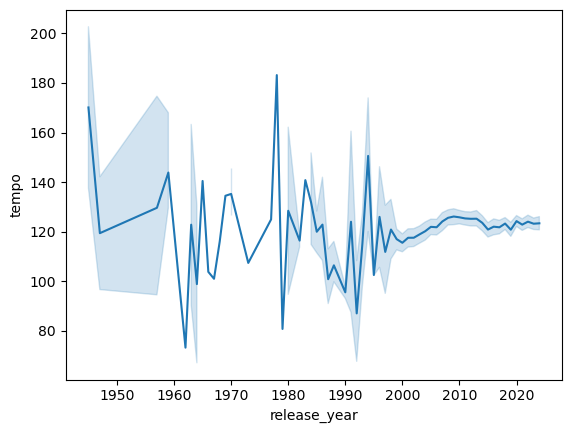

In [897]:
sns.lineplot(data=audio_performance_unique, x='release_year', y='tempo')

<Axes: xlabel='release_year', ylabel='energy'>

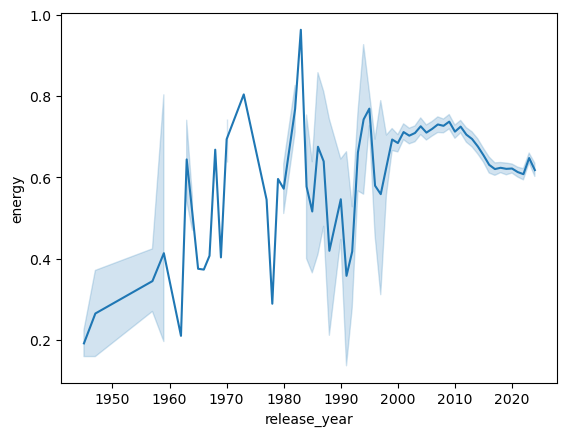

In [898]:
sns.lineplot(data=audio_performance_unique, x='release_year', y='energy')


<Axes: xlabel='release_year', ylabel='loudness'>

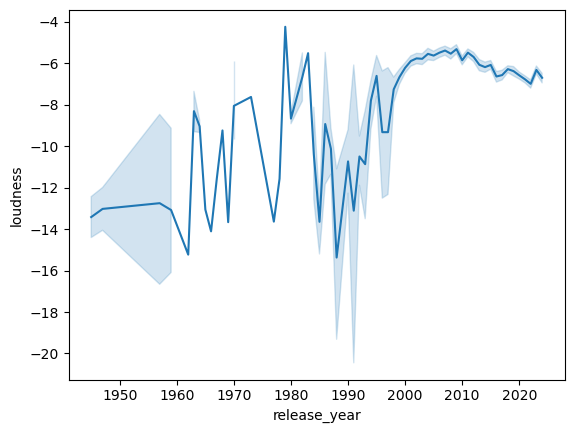

In [899]:
sns.lineplot(data=audio_performance_unique, x='release_year', y='loudness')


<Axes: xlabel='release_year', ylabel='valence'>

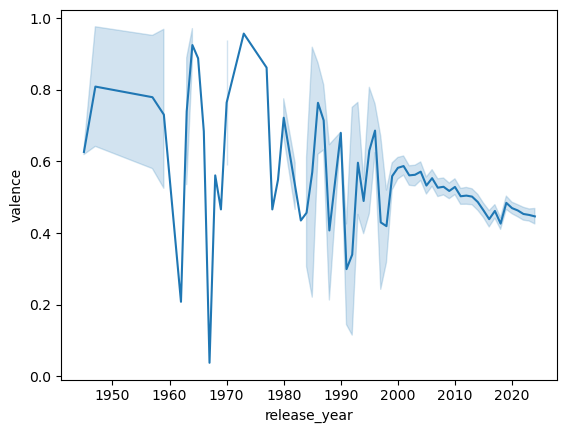

In [900]:
sns.lineplot(data=audio_performance_unique, x='release_year', y='valence')


<Axes: xlabel='release_year', ylabel='explicit'>

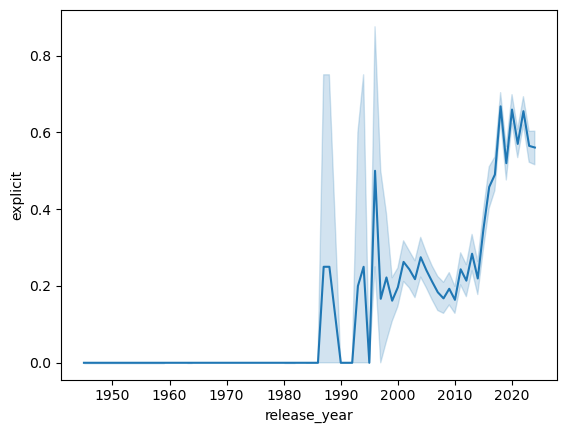

In [901]:
sns.lineplot(data=audio_performance_unique, x='release_year', y='explicit')


<Axes: xlabel='release_year', ylabel='mode'>

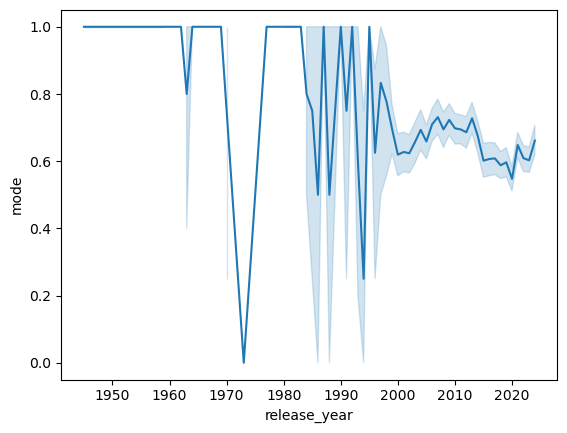

In [902]:
sns.lineplot(data=audio_performance_unique, x='release_year', y='mode')


<Axes: xlabel='release_year', ylabel='speechiness'>

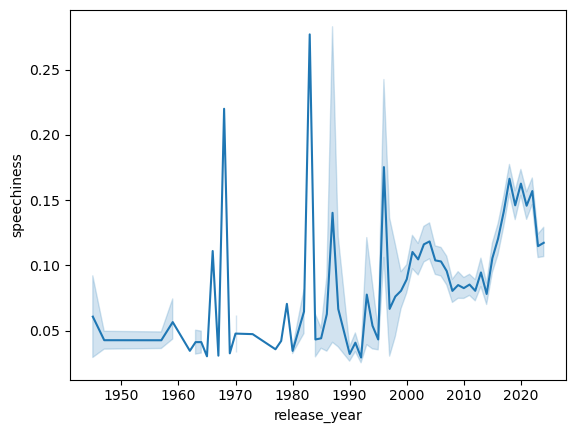

In [903]:
sns.lineplot(data=audio_performance_unique, x='release_year', y='speechiness')


<Axes: xlabel='release_year', ylabel='danceability'>

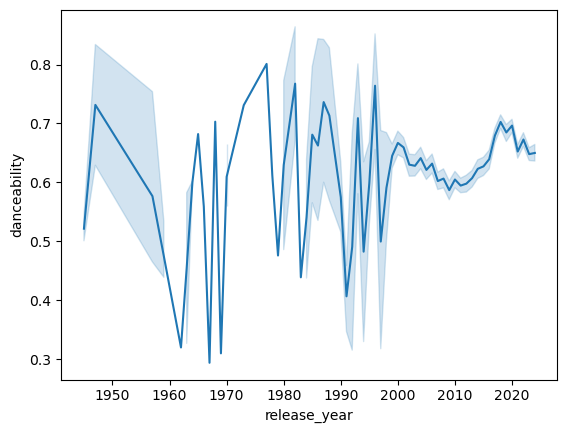

In [904]:
sns.lineplot(data=audio_performance_unique, x='release_year', y='danceability')


<Axes: xlabel='release_year', ylabel='duration_ms'>

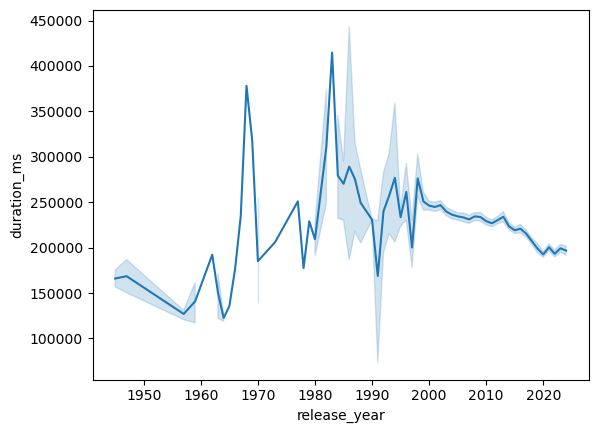

In [905]:
sns.lineplot(data=audio_performance_unique, x='release_year', y='duration_ms')


<Axes: xlabel='release_year', ylabel='instrumentalness'>

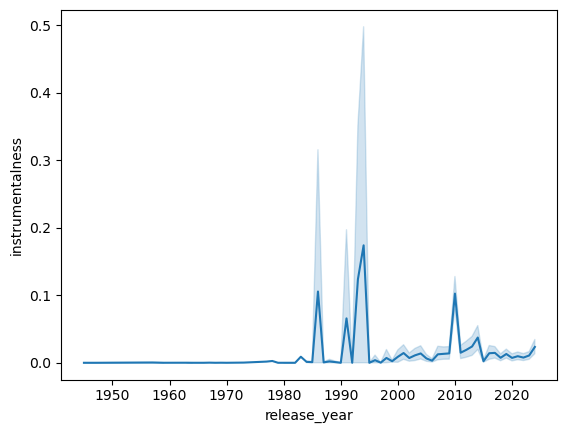

In [906]:
sns.lineplot(data=audio_performance_unique, x='release_year', y='instrumentalness')


## Filtering for only songs from 2000 and onwards 
- I am interested in how the music landscape has changed in the last 25 years. What type of music is being created and how has that changed. 
- What kind of songs are being released, and what does that say about us? How does music mirror society, and vice versa?
- Therefore I am only filtering for songs released in the last 25 years. Songs released before could not possibly be impacted by a society/time that had not yet happened. 

In [907]:
tracks_2000 = audio_performance_unique[audio_performance_unique['release_year'] >= 2000]

<Axes: xlabel='release_year', ylabel='duration_ms'>

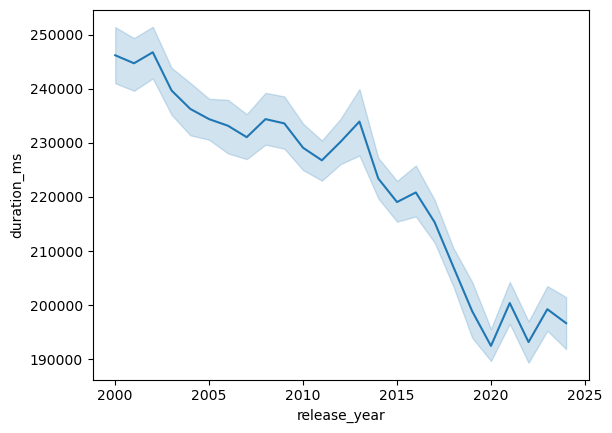

In [908]:
sns.lineplot(data=tracks_2000, x='release_year', y='duration_ms')


<Axes: xlabel='release_year', ylabel='tempo'>

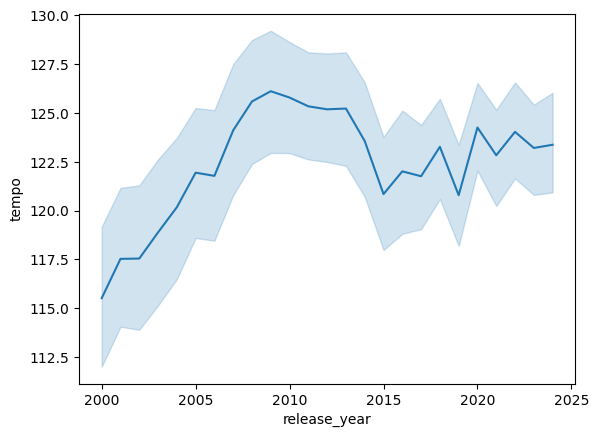

In [909]:
sns.lineplot(data=tracks_2000, x='release_year', y='tempo')


<Axes: xlabel='release_year', ylabel='valence'>

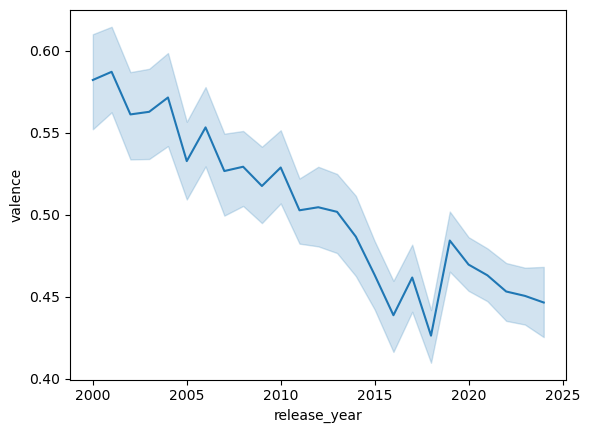

In [910]:
sns.lineplot(data=tracks_2000, x='release_year', y='valence')


<Axes: xlabel='release_year', ylabel='explicit'>

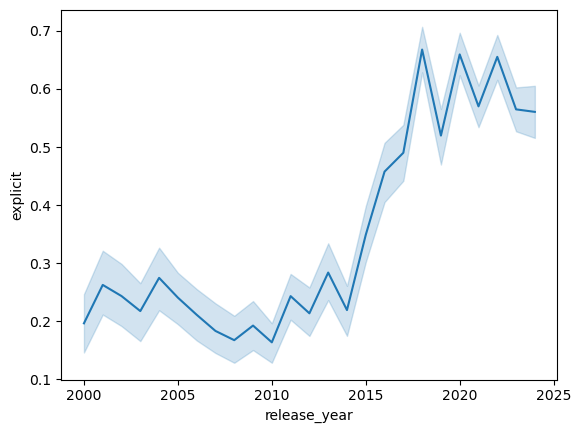

In [911]:
sns.lineplot(data=tracks_2000, x='release_year', y='explicit')


Text(0.5, 1.0, 'songs with explicit content')

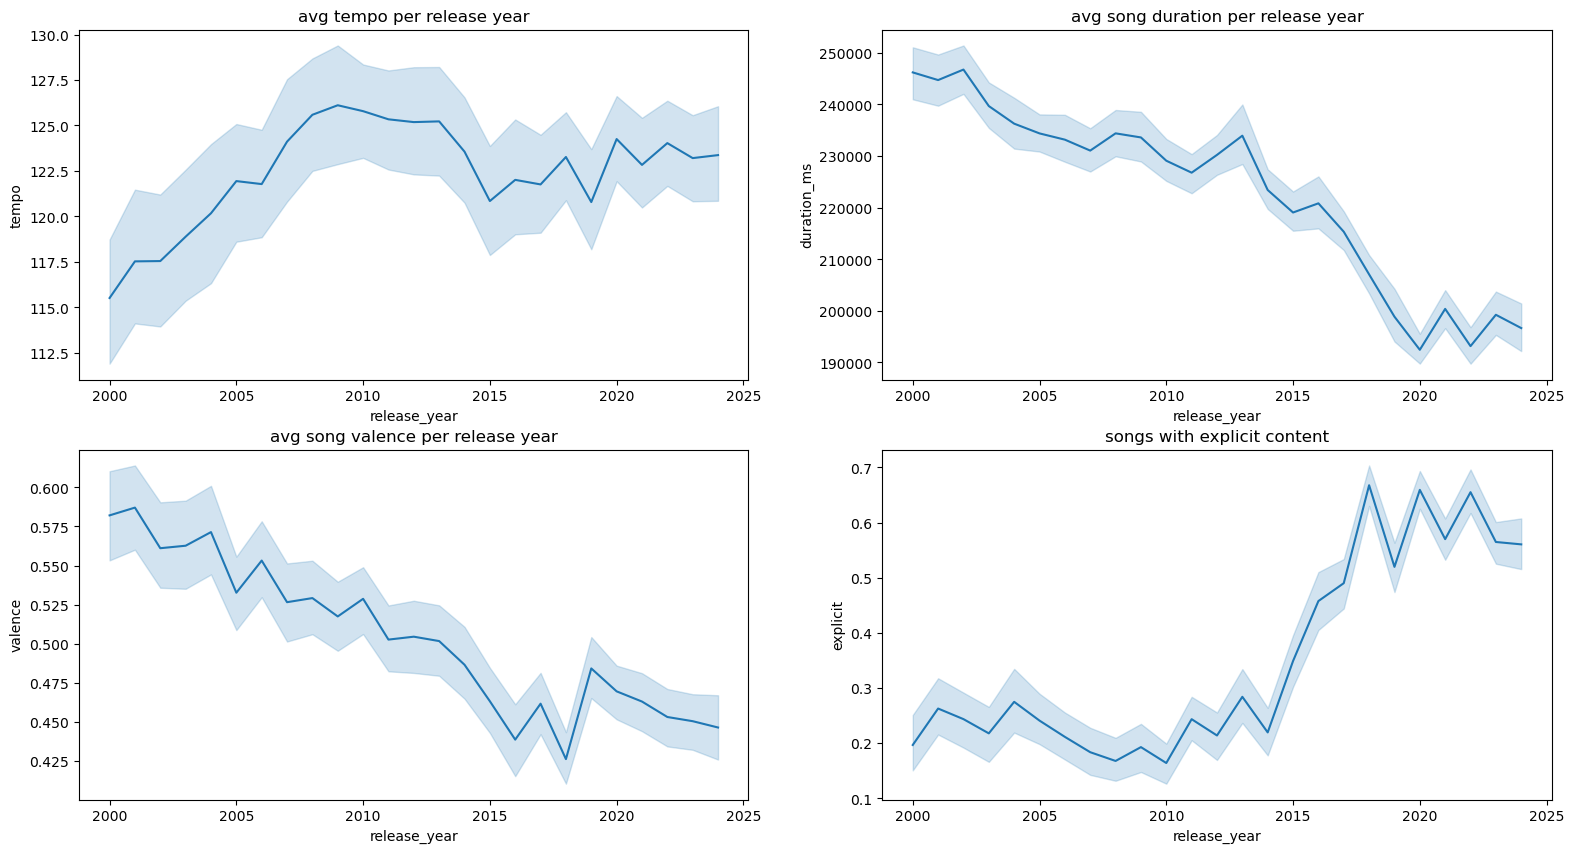

In [912]:
# Putting the plots together in a grid like we were taught during the seaborn session 
fig, axes = plt.subplots(2,2, figsize = (19,10))
sns.lineplot(data=tracks_2000, x='release_year', y='tempo', ax=axes[0,0],)
sns.lineplot(data=tracks_2000, x='release_year', y='duration_ms', ax=axes[0,1])
sns.lineplot(data=tracks_2000, x='release_year', y='valence', ax=axes[1,0])
sns.lineplot(data=tracks_2000, x='release_year', y='explicit', ax=axes[1,1])

axes[0,0].set_title('avg tempo per release year')
axes[0,1].set_title('avg song duration per release year')
axes[1,0].set_title('avg song valence per release year')
axes[1,1].set_title('songs with explicit content')

In [913]:
# Looking at the most popular tracks, which I decide is the ones that has spent at least 10 weeks on the charts. 
popular_tracks_2000 = tracks_2000[tracks_2000['weeks_on_chart'] >= 10]
popular_tracks_2000

,artist_id,track_id,artist_name,popularity,followers,track_name,duration_ms,release_date,album_type,explicit,...,liveness,valence,tempo,time_signature,release_year,avg_position,weeks_on_chart,weeks_on_top,first_chart_week,has_topped_charts
5,00FQb4jTyendYWaN8pK0wa,2nMeu6UenVvwUktBCpLMK9,Lana Del Rey,92,40583711,Young And Beautiful,236053,2013-01-01,single,False,...,0.1100,0.151,113.986,4.0,2013,73.14,21,0,2013-05-11,False
6,00FQb4jTyendYWaN8pK0wa,6PUIzlqotEmPuBfjbwYWOB,Lana Del Rey,92,40583711,Summertime Sadness (Lana Del Rey Vs. Cedric Ge...,214912,2013-02-01,single,False,...,0.1300,0.110,126.052,4.0,2013,23.61,23,0,2013-07-27,False
20,01QTIT5P1pFP3QnnFSdsJf,2dxjKgT0li4qBI3QwuN9Ih,Lupe Fiasco,68,1907906,Touch The Sky,236600,2005-08-30,album,True,...,0.3090,0.554,98.560,1.0,2005,68.78,18,0,2006-02-25,False
23,01QTIT5P1pFP3QnnFSdsJf,4NTWZqvfQTlOMitlVn6tew,Lupe Fiasco,68,1907906,The Show Goes On,239613,2011-03-04,album,True,...,0.1550,0.650,143.067,4.0,2011,31.58,33,0,2010-11-27,False
26,01QTIT5P1pFP3QnnFSdsJf,4Nomj38R7Ds0P8I8orW2Tv,Lupe Fiasco,68,1907906,Out of My Head (feat. Trey Songz),204013,2011-03-04,album,False,...,0.4360,0.380,99.058,4.0,2011,63.12,17,0,2011-06-11,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15020,7z5WFjZAIYejWy0NI5lv4T,3GJ4hzg4lrGwU51Y3VARbF,Dan + Shay,70,3186426,Speechless,213386,2018-06-22,album,False,...,0.2400,0.386,135.929,4.0,2018,43.15,40,0,2018-09-22,False
15021,7z5WFjZAIYejWy0NI5lv4T,08tq1XcHwVt5PHXUo87i0D,Dan + Shay,70,3186426,All To Myself,169920,2018-06-22,album,False,...,0.1250,0.565,94.975,4.0,2018,62.05,20,0,2019-05-18,False
15023,7z5WFjZAIYejWy0NI5lv4T,5ovVcYo2MvjVydFwFyaaqy,Dan + Shay,70,3186426,I Should Probably Go To Bed,171826,2020-07-31,single,False,...,0.1120,0.309,131.935,4.0,2020,50.38,24,0,2020-08-15,False
15025,7z5WFjZAIYejWy0NI5lv4T,472vIK1ldetTxRxG3ovaiY,Dan + Shay,70,3186426,Glad You Exist,144533,2021-02-05,single,False,...,0.1190,0.660,103.953,4.0,2021,62.28,29,0,2021-02-20,False


Text(0.5, 1.0, 'songs with explicit content')

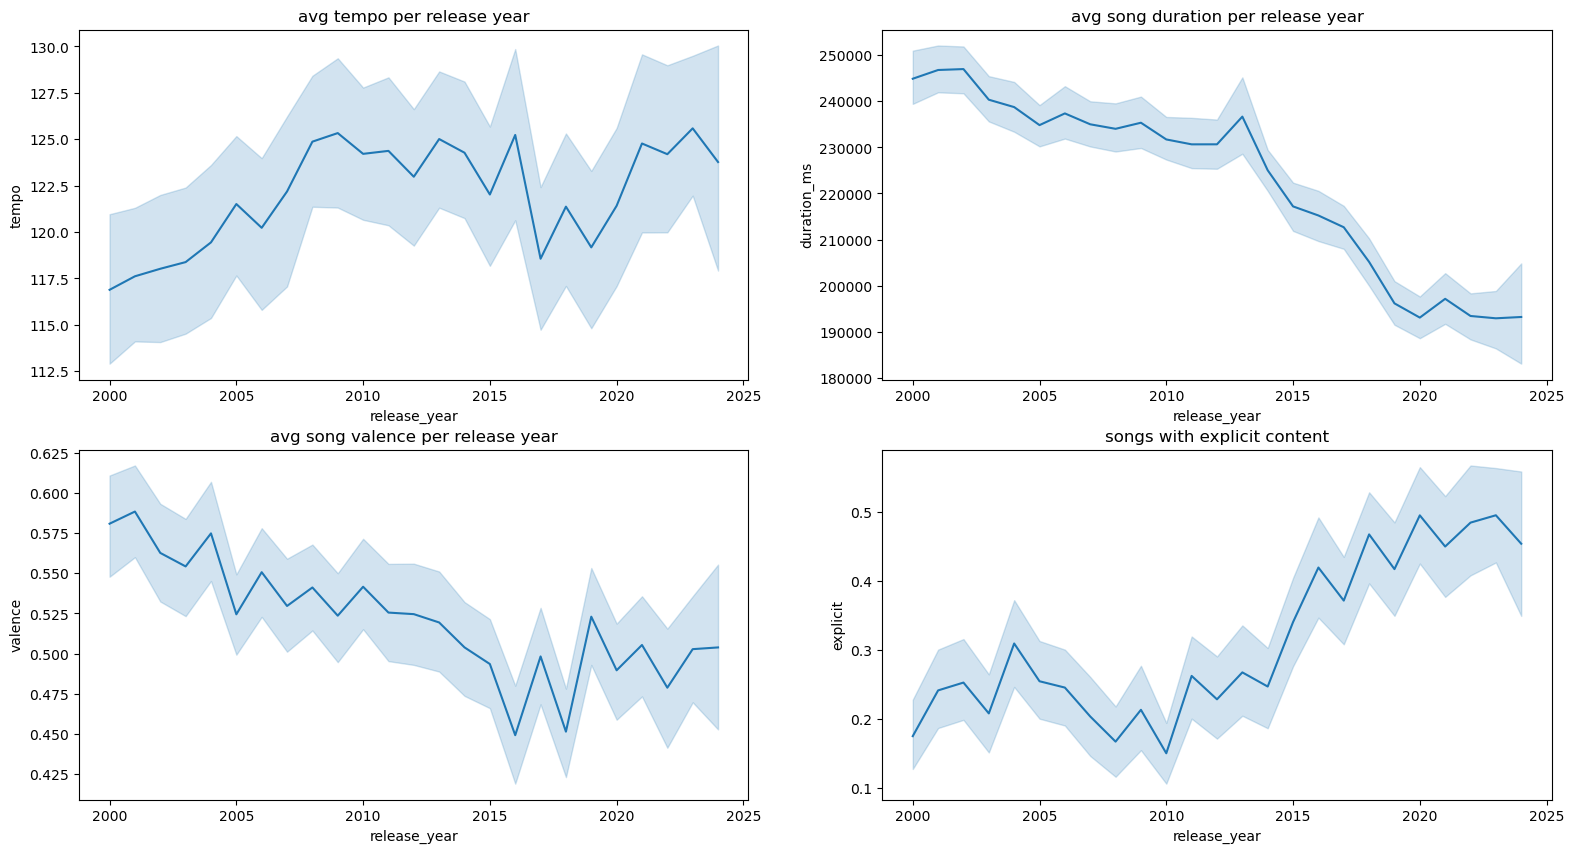

In [914]:
# Looking at the most interesting findings from previous charts but only for my defintion of popular tracks. How tempo is increasing, duration is decreasing. The explicit content is increasing and valence is decreasing. 
fig, axes = plt.subplots(2,2, figsize = (19,10))
sns.lineplot(data=popular_tracks_2000, x='release_year', y='tempo', ax=axes[0,0],)
sns.lineplot(data=popular_tracks_2000, x='release_year', y='duration_ms', ax=axes[0,1])
sns.lineplot(data=popular_tracks_2000, x='release_year', y='valence', ax=axes[1,0])
sns.lineplot(data=popular_tracks_2000, x='release_year', y='explicit', ax=axes[1,1])

axes[0,0].set_title('avg tempo per release year')
axes[0,1].set_title('avg song duration per release year')
axes[1,0].set_title('avg song valence per release year')
axes[1,1].set_title('songs with explicit content')

# The quick fix society. Music behaviour has changed. Shorter songs with higher tempo is being released. Likely catering to the landscape of social media and content creation. Gone are the days of an 8 minute Bohemian Rapsody. 
# People need songs that can be used in a TikTok or a reel, and that most likley play into the behaviour we see in the plots. 
# Society is also becoming less restrictive about explicit content. Possibly because popular social media platforms have become less regulated, and because explicit content is more easily accessible now than ever. Music is a mirror of society. 
# The increased tempo of songs, the shorter songs and the increase of explicit content in these short and fast songs are a likely reason why the valence has decreased a lot since the beginning of the millenium. 
# The avg valence of songs from 2015 and onwards is much lower than the start of the millenium. Are the quick fix society becoming more sad and melancholic? Since music is a mirror of society, signs point towards yes. 


# Analysis - Part 2 

## The most popular song

In [915]:
top_10_charts = audio_performance_unique.nlargest(10, 'weeks_on_chart').sort_values('avg_position')
top_10_charts
# Of songs that have charted the most weeks, Blinding Lights by the weekend also have the highest avg position on the charts. That is a metric for the most popular song in my opinion. 

,artist_id,track_id,artist_name,popularity,followers,track_name,duration_ms,release_date,album_type,explicit,...,liveness,valence,tempo,time_signature,release_year,avg_position,weeks_on_chart,weeks_on_top,first_chart_week,has_topped_charts
3633,1Xyo4u8uXC1ZmMpatF05PJ,0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,96,92598894,Blinding Lights,200040,2020-03-20,album,False,...,0.0897,0.334,171.001,4.0,2020,11.12,90,4,2019-12-14,True
4591,246dkjvS1zLTtiykXe5h60,7xQAfvXzm3AkraOtGPWIZg,Post Malone,92,45545078,Wow.,149546,2019-09-06,album,True,...,0.1030,0.389,99.952,4.0,2019,15.94,83,1,2018-03-10,True
3557,1Xyo4u8uXC1ZmMpatF05PJ,5QO79kh1waicV47BqGRL3g,The Weeknd,96,92598894,Save Your Tears,215626,2020-03-20,album,True,...,0.5430,0.644,118.049,4.0,2020,16.78,69,2,2020-04-04,True
14775,7tYKF4w9nC0nq9CsPZTHyP,4iZ4pt7kvcaH6Yo8UoZ4s2,SZA,90,23627089,Snooze,201800,2022-12-09,album,True,...,0.1100,0.392,143.008,4.0,2022,19.97,70,0,2022-12-24,False
9874,4yvcSjfu4PC0CYQyLy4wSq,3USxtqRwSYz57Ewm6wWRMp,Glass Animals,78,4302921,Heat Waves,238805,2020-08-07,album,False,...,0.0921,0.531,80.870,4.0,2020,21.96,91,5,2021-01-16,True
10704,5Pwc4xIPtQLFEnJriah9YJ,6sy3LkhNFjJWlaeSMNwQ62,OneRepublic,85,17522655,Counting Stars,257840,2014-01-01,album,False,...,0.1150,0.474,122.013,4.0,2014,26.31,68,0,2013-07-06,False
5633,2jLE4BoXHriQ96JagEtiDP,0IkKz2J93C94Ei4BvDop7P,Lauren Bennett,62,8619,Party Rock Anthem,262173,2011-01-01,album,False,...,0.2660,0.359,129.992,4.0,2011,29.38,79,6,2011-02-12,True
9484,4phGZZrJZRo4ElhRtViYdl,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,73,7238795,I'm Yours,242946,2008-05-12,album,False,...,0.0973,0.712,150.960,4.0,2008,29.51,76,0,2008-05-03,False
10044,53XhwfbYqKCa1cC15pYq2q,4G8gkOterJn0Ywt6uhqbhp,Imagine Dragons,89,54853599,Radioactive,186813,2012-09-04,album,False,...,0.6680,0.237,136.239,4.0,2012,32.82,87,0,2012-08-18,False
9388,4njdEjTnLfcGImKZu1iSrz,7ueP5u2qkdZbIPN2YA6LR0,AWOLNATION,63,2076792,Sail,259093,2011-03-15,album,False,...,0.0964,0.272,119.051,4.0,2011,50.41,79,0,2011-09-03,False


## Comparing Blinding Lights to all other songs 

### Creating a Blinding Lights vs All songs dataframe - To use for makings plots 

In [916]:
# My dataframe I will use for making plots 
chart_data = pd.DataFrame

In [917]:
# calculating the means I want to investigate, which are tempo, duration, valence and explicit 

# for just Blinding Lights
blinding_lights_data = audio_performance_unique[audio_performance_unique['track_name'] == 'Blinding Lights']

tempo_bl = blinding_lights_data['tempo'].sum()
duration_bl = blinding_lights_data['duration_ms'].sum()
valence_bl = blinding_lights_data['valence'].sum()
explicit_bl = blinding_lights_data['explicit'].sum()

# for all songs except Blinding Lights
all_other_songs = audio_performance_unique[audio_performance_unique['track_name'] != 'Blinding Lights']

mean_tempo_all = all_other_songs['tempo'].mean() 
mean_duration_all = all_other_songs['duration_ms'].mean()
mean_valence_all = all_other_songs['valence'].mean() 
mean_explicit_all = all_other_songs['explicit'].mean() 


In [918]:
# filling out my dataframe with my calculations 

chart_data = chart_data({
    'Category': ['All songs', 'Blinding Lights'],
    'Avg Tempo': [mean_tempo_all, tempo_bl], 
    'Avg Duration': [mean_duration_all, duration_bl],
    'Avg Valence': [mean_valence_all, valence_bl], 
    'Avg Explicit': [mean_explicit_all, explicit_bl]
})

In [919]:
#testing my dataframe 
chart_data

,Category,Avg Tempo,Avg Duration,Avg Valence,Avg Explicit
0,All songs,122.672375,218640.55895,0.494745,0.390689
1,Blinding Lights,171.001000,200040.00000,0.334000,0.000000


In [920]:
# making it easier to read 
chart_data = chart_data.round(2)
chart_data

,Category,Avg Tempo,Avg Duration,Avg Valence,Avg Explicit
0,All songs,122.67,218640.56,0.49,0.39
1,Blinding Lights,171.00,200040.00,0.33,0.00


### Plotting it out 



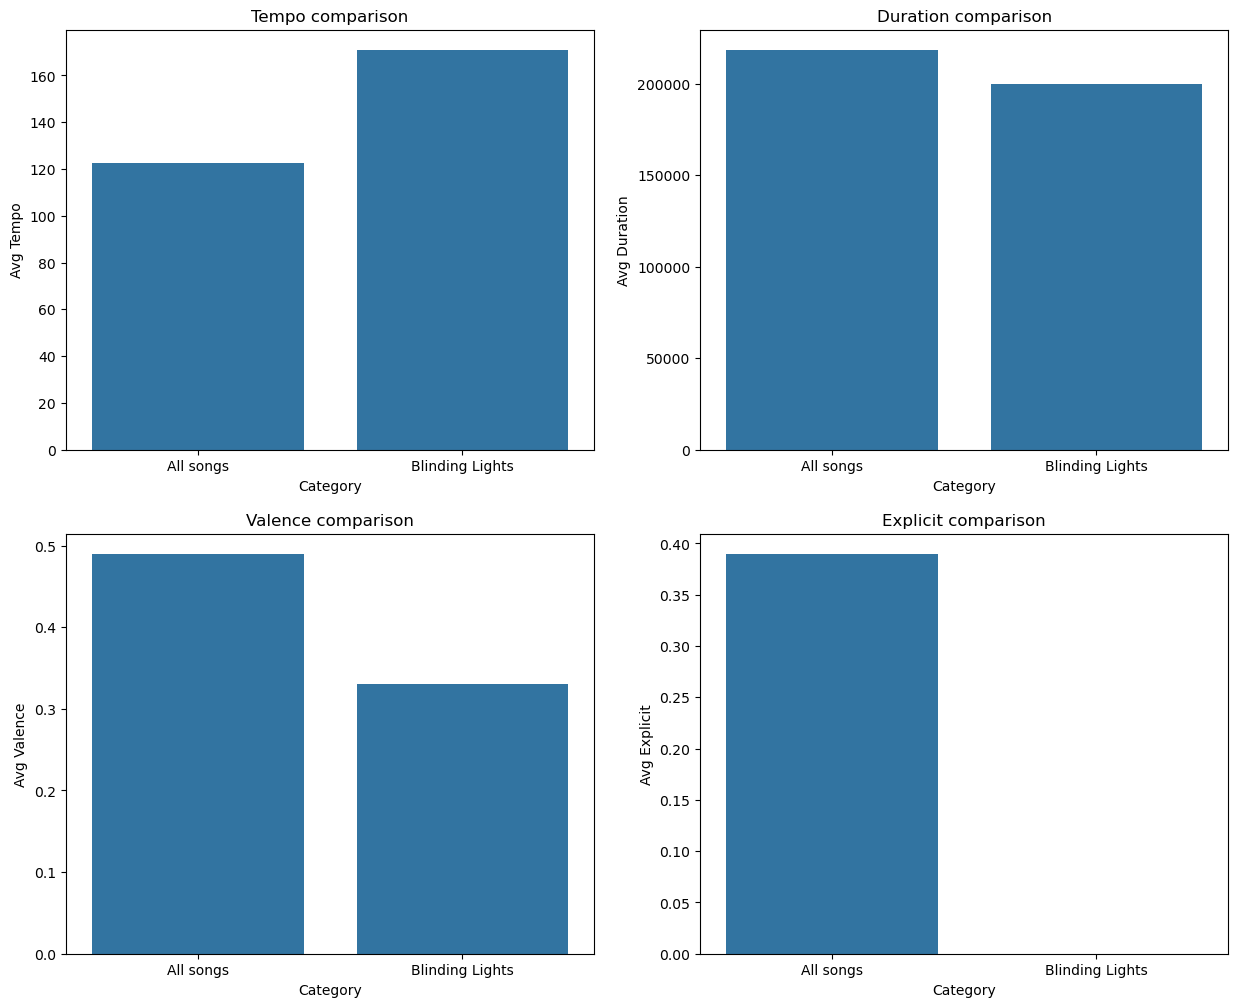

In [921]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.barplot(data=chart_data, x='Category', y='Avg Tempo', ax= axes[0,0])
sns.barplot(data=chart_data, x='Category', y='Avg Duration', ax= axes[0,1])
sns.barplot(data=chart_data, x='Category', y='Avg Valence', ax= axes[1,0])
sns.barplot(data=chart_data, x='Category', y='Avg Explicit', ax= axes[1,1])

axes[0,0].set_title('Tempo comparison')
axes[0,1].set_title('Duration comparison')
axes[1,0].set_title('Valence comparison')
axes[1,1].set_title('Explicit comparison')
plt.show()

We saw in earlier analysis that popular songs are becoming faster and faster during the last 25 years. In terms of tempo (BPM).
They are also becoming shorter and shorter. The valence is getting lower and lower and the explicit content is increasing. 

To me it is therefore not a surprise to look at these plots. 
- Blinding Lights has a way higher tempo at 171 BPM than the avg of all songs. In fact it is much higher than any of the yearly averages we looked at in my previous plots. 
- The song is also significantly shorter than the avg song, and shorter than the majority of yearly averages we looked at earlier. 
- The valence is also much lower at 0.33 than the avg of all songs, and any of the yearly averages for popular songs we looked at previously.
- It is not however deemed to be explicit, which as pointed to previously, is also increasing amongst popular songs on a yearly basis.

So on average popular songs are getting faster, shorter and a lesser valence score over time, from 2000 to 2025. The most popular song out of them all, Blinding Lights released in 2020, is hammering that point home. Being super fast, shorter than average and very very low valence. 


# Analysis - Part 3 

## The most popular artists and their music - Correlation

In [922]:
# I will use Spotify's popularity metric for this 
# I can use my audio_performance dataframe for this, since I will only analyze and group by artists. Therefore I want every song that the artist has been involved in to be in the dataframe. 

# Finding the top 50 artists based on popularity and getting their artist IDs
top_50_popularity = audio_performance.groupby('artist_id')['popularity'].max().nlargest(50).index

# Filtering the dataframe to only have artists that are in the top 50
top_50_df = audio_performance[audio_performance['artist_id'].isin(top_50_popularity)]
top_50_df



,artist_id,track_id,artist_name,popularity,followers,track_name,duration_ms,release_date,album_type,explicit,...,liveness,valence,tempo,time_signature,release_year,avg_position,weeks_on_chart,weeks_on_top,first_chart_week,has_topped_charts
0,00FQb4jTyendYWaN8pK0wa,4zmKGsrXjLmljb5fTaBTot,Lana Del Rey,92,40583711,Snow On The Beach (feat. More Lana Del Rey),229942,2023-05-26,album,True,...,0.1050,0.265,109.937,4.0,2023,47.25,8,0,2022-11-05,False
1,00FQb4jTyendYWaN8pK0wa,6GGtHZgBycCgGBUhZo81xe,Lana Del Rey,92,40583711,Say Yes To Heaven,209156,2023-05-19,single,False,...,0.1180,0.145,99.898,4.0,2023,81.0,3,0,2023-06-03,False
2,00FQb4jTyendYWaN8pK0wa,22DH8NChecsgPxDjA4pqer,Lana Del Rey,92,40583711,Tough,188828,2024-07-03,single,False,...,0.1210,0.211,84.989,4.0,2024,65.0,5,0,2024-07-20,False
4,00FQb4jTyendYWaN8pK0wa,24jvD83UgLmrdGjhWTFslY,Lana Del Rey,92,40583711,Video Games,281960,2012-11-12,album,False,...,0.0870,0.181,72.847,5.0,2012,91.0,1,0,2012-01-28,False
5,00FQb4jTyendYWaN8pK0wa,2nMeu6UenVvwUktBCpLMK9,Lana Del Rey,92,40583711,Young And Beautiful,236053,2013-01-01,single,False,...,0.1100,0.151,113.986,4.0,2013,73.14,21,0,2013-05-11,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14803,7tYKF4w9nC0nq9CsPZTHyP,5KE9b4x7Zj2A8XtbkqhqTe,SZA,90,23627089,Staring At The Sun (feat. SZA),168280,2019-09-06,album,True,...,0.3080,0.347,95.073,4.0,2019,52.0,2,0,2019-09-21,False
14804,7tYKF4w9nC0nq9CsPZTHyP,463PQggkmk5tTw8ug0ahOX,SZA,90,23627089,The Other Side (from Trolls World Tour),188186,2020-02-26,single,False,...,0.1320,0.709,105.979,4.0,2020,74.0,7,0,2020-03-14,False
14805,7tYKF4w9nC0nq9CsPZTHyP,0P6AWOA4LG1XOctzaVu5tt,SZA,90,23627089,The Weekend - Funk Wav Remix,171805,2017-12-15,single,False,...,0.1260,0.667,101.925,4.0,2017,73.6,5,0,2020-09-12,False
14806,7tYKF4w9nC0nq9CsPZTHyP,7Bar1kLTmsRmH6FCKKMEyU,SZA,90,23627089,Hit Different,202007,2020-09-04,single,True,...,0.0965,0.716,120.074,4.0,2020,75.1,20,0,2020-09-19,False


In [924]:
# Just checking to see if we for some reason have any duplicate rows 
top_50_df[top_50_df.duplicated(keep=False)]



,artist_id,track_id,artist_name,popularity,followers,track_name,duration_ms,release_date,album_type,explicit,...,liveness,valence,tempo,time_signature,release_year,avg_position,weeks_on_chart,weeks_on_top,first_chart_week,has_topped_charts


In [925]:
top_50_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2580 entries, 0 to 14807
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   artist_id          2580 non-null   object        
 1   track_id           2580 non-null   object        
 2   artist_name        2580 non-null   object        
 3   popularity         2580 non-null   Int64         
 4   followers          2580 non-null   Int64         
 5   track_name         2580 non-null   object        
 6   duration_ms        2580 non-null   Int64         
 7   release_date       2580 non-null   datetime64[ns]
 8   album_type         2580 non-null   object        
 9   explicit           2580 non-null   boolean       
 10  danceability       2580 non-null   float64       
 11  energy             2580 non-null   float64       
 12  key                2580 non-null   float64       
 13  loudness           2580 non-null   float64       
 14  mode        

In [926]:
top_50_grouped = top_50_df.groupby(['artist_id', 'artist_name']).agg(
    number_of_songs=('track_id', 'count'),
    avg_duration=('duration_ms', 'mean'), 
    avg_tempo=('tempo', 'mean'), 
    avg_valence=('valence', 'mean'), 
    avg_explicit=('explicit', 'mean'), 
    popularity=('popularity', 'mean'), 
    followers=('followers', 'mean'), 
    avg_chart_position=('avg_position', 'mean'), 
    weeks_on_chart=('weeks_on_chart', 'sum'),
    avg_weeks_on_chart=('weeks_on_chart', 'mean'),
    weeks_on_top=('weeks_on_top', 'sum')
    
).sort_values('popularity', ascending=False).round(2).reset_index()
top_50_grouped.head()

,artist_id,artist_name,number_of_songs,avg_duration,avg_tempo,avg_valence,avg_explicit,popularity,followers,avg_chart_position,weeks_on_chart,avg_weeks_on_chart,weeks_on_top
0,06HL4z0CvFAxyc27GXpf02,Taylor Swift,199,232165.24,122.04,0.41,0.16,100.0,123544806.0,53.56,1468,7.38,35
1,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,94,231864.1,122.43,0.35,0.63,96.0,92598894.0,55.21,1028,10.94,18
2,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,44,223249.82,116.79,0.31,0.09,96.0,100687015.0,59.93,454,10.32,1
3,3TVXtAsR1Inumwj472S9r4,Drake,305,234854.36,120.69,0.37,0.88,96.0,92537455.0,56.34,3071,10.07,55
4,4q3ewBCX7sLwd24euuV69X,Bad Bunny,92,215660.35,121.85,0.49,0.77,95.0,86231149.0,68.99,750,8.15,1


In [927]:
# Adding a column for wether or not the artist has topped the charts at any point 
top_50_grouped['has_topped_charts'] = top_50_grouped['weeks_on_top'] > 0
top_50_grouped

,artist_id,artist_name,number_of_songs,avg_duration,avg_tempo,avg_valence,avg_explicit,popularity,followers,avg_chart_position,weeks_on_chart,avg_weeks_on_chart,weeks_on_top,has_topped_charts
0,06HL4z0CvFAxyc27GXpf02,Taylor Swift,199,232165.24,122.04,0.41,0.16,100.0,123544806.0,53.56,1468,7.38,35,True
1,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,94,231864.1,122.43,0.35,0.63,96.0,92598894.0,55.21,1028,10.94,18,True
2,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,44,223249.82,116.79,0.31,0.09,96.0,100687015.0,59.93,454,10.32,1,True
3,3TVXtAsR1Inumwj472S9r4,Drake,305,234854.36,120.69,0.37,0.88,96.0,92537455.0,56.34,3071,10.07,55,True
4,4q3ewBCX7sLwd24euuV69X,Bad Bunny,92,215660.35,121.85,0.49,0.77,95.0,86231149.0,68.99,750,8.15,1,True
5,74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,14,183507.57,108.75,0.58,0.5,95.0,13599895.0,44.44,147,10.5,1,True
6,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,113,216733.0,127.01,0.34,0.88,94.0,33611357.0,63.58,771,6.82,4,True
7,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,32,226168.41,121.76,0.60,0.28,94.0,60197201.0,41.11,671,20.97,32,True
8,7dGJo4pcD2V6oG8kP0tJRR,Eminem,93,260408.84,122.19,0.54,0.96,93.0,91487128.0,58.59,567,6.1,2,True
9,12GqGscKJx3aE4t07u7eVZ,Peso Pluma,31,199263.13,136.09,0.73,0.81,93.0,16616208.0,72.64,272,8.77,0,False


Text(0.5, 1.0, 'Top 50 artists - Correlations')

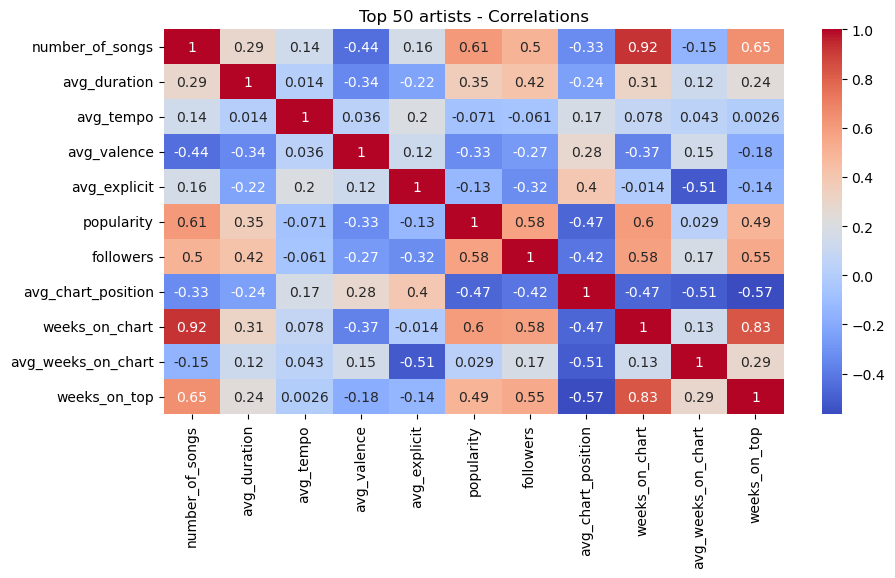

In [928]:
plt.figure(figsize=(10,5))
top_50_corr = top_50_grouped.select_dtypes("number").corr()
sns.heatmap(data=top_50_corr, annot=True, cmap='coolwarm')

plt.title("Top 50 artists - Correlations")

Text(0.5, 1.0, 'Weeks on chart vs Valence')

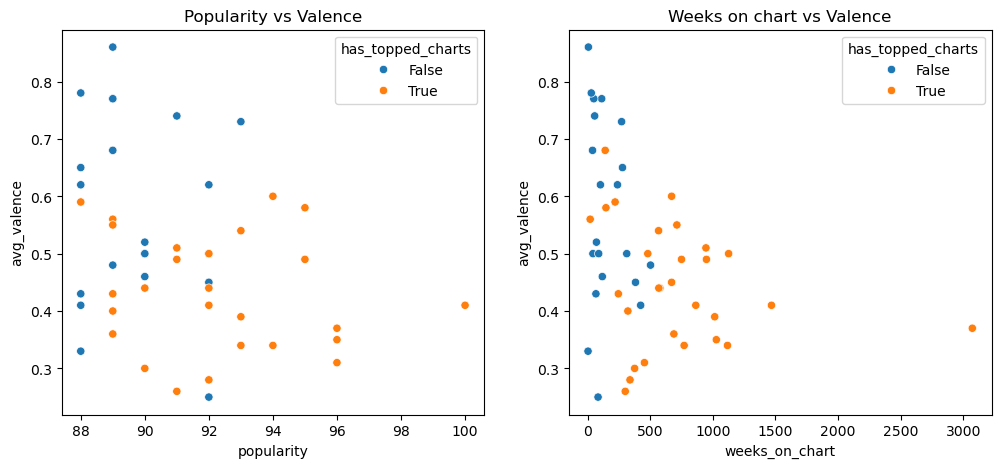

In [929]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.scatterplot(data=top_50_grouped, x='popularity', y='avg_valence', hue='has_topped_charts', ax=axes[0])
sns.scatterplot(data=top_50_grouped, x='weeks_on_chart', y='avg_valence', hue='has_topped_charts', ax=axes[1])

axes[0].set_title('Popularity vs Valence')
axes[1].set_title('Weeks on chart vs Valence')

Average valence shows a moderate negative correlation with both popularity and weeks on chart, suggesting that more successful and popular artists tend to release music with lower overall positivity.
The relationship is moderate, but it does mean that decreased valence is associated with success.

# Analysis - Part 4 

## The most popular artists and what type of music they make 

In [930]:
# I will use Spotify's popularity metric for this 
# I can use my audio_performance dataframe for this, since I will only analyze and group by artists. Therefore I want every song that the artist has been involved in to be in the dataframe. 

# Finding the top 50 artists based on popularity and getting their artist IDs
top_50_popularity = audio_performance.groupby('artist_id')['popularity'].max().nlargest(50).index

# Filtering the dataframe to only have artists that are in the top 50
top_50_df = audio_performance[audio_performance['artist_id'].isin(top_50_popularity)]
top_50_df

,artist_id,track_id,artist_name,popularity,followers,track_name,duration_ms,release_date,album_type,explicit,...,liveness,valence,tempo,time_signature,release_year,avg_position,weeks_on_chart,weeks_on_top,first_chart_week,has_topped_charts
0,00FQb4jTyendYWaN8pK0wa,4zmKGsrXjLmljb5fTaBTot,Lana Del Rey,92,40583711,Snow On The Beach (feat. More Lana Del Rey),229942,2023-05-26,album,True,...,0.1050,0.265,109.937,4.0,2023,47.25,8,0,2022-11-05,False
1,00FQb4jTyendYWaN8pK0wa,6GGtHZgBycCgGBUhZo81xe,Lana Del Rey,92,40583711,Say Yes To Heaven,209156,2023-05-19,single,False,...,0.1180,0.145,99.898,4.0,2023,81.0,3,0,2023-06-03,False
2,00FQb4jTyendYWaN8pK0wa,22DH8NChecsgPxDjA4pqer,Lana Del Rey,92,40583711,Tough,188828,2024-07-03,single,False,...,0.1210,0.211,84.989,4.0,2024,65.0,5,0,2024-07-20,False
4,00FQb4jTyendYWaN8pK0wa,24jvD83UgLmrdGjhWTFslY,Lana Del Rey,92,40583711,Video Games,281960,2012-11-12,album,False,...,0.0870,0.181,72.847,5.0,2012,91.0,1,0,2012-01-28,False
5,00FQb4jTyendYWaN8pK0wa,2nMeu6UenVvwUktBCpLMK9,Lana Del Rey,92,40583711,Young And Beautiful,236053,2013-01-01,single,False,...,0.1100,0.151,113.986,4.0,2013,73.14,21,0,2013-05-11,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14803,7tYKF4w9nC0nq9CsPZTHyP,5KE9b4x7Zj2A8XtbkqhqTe,SZA,90,23627089,Staring At The Sun (feat. SZA),168280,2019-09-06,album,True,...,0.3080,0.347,95.073,4.0,2019,52.0,2,0,2019-09-21,False
14804,7tYKF4w9nC0nq9CsPZTHyP,463PQggkmk5tTw8ug0ahOX,SZA,90,23627089,The Other Side (from Trolls World Tour),188186,2020-02-26,single,False,...,0.1320,0.709,105.979,4.0,2020,74.0,7,0,2020-03-14,False
14805,7tYKF4w9nC0nq9CsPZTHyP,0P6AWOA4LG1XOctzaVu5tt,SZA,90,23627089,The Weekend - Funk Wav Remix,171805,2017-12-15,single,False,...,0.1260,0.667,101.925,4.0,2017,73.6,5,0,2020-09-12,False
14806,7tYKF4w9nC0nq9CsPZTHyP,7Bar1kLTmsRmH6FCKKMEyU,SZA,90,23627089,Hit Different,202007,2020-09-04,single,True,...,0.0965,0.716,120.074,4.0,2020,75.1,20,0,2020-09-19,False


In [931]:
# Filtering the dataframe to only have artists that are NOT in the top 50
not_top_50_df = audio_performance[~audio_performance['artist_id'].isin(top_50_popularity)]
not_top_50_df

,artist_id,track_id,artist_name,popularity,followers,track_name,duration_ms,release_date,album_type,explicit,...,liveness,valence,tempo,time_signature,release_year,avg_position,weeks_on_chart,weeks_on_top,first_chart_week,has_topped_charts
17,00UOluVoYY4F2blO5DmgRj,2e9EZ2V5QGGZPMJacO3y0Y,Kebo Gotti,46,2201,Grove St. Party (feat. Kebo Gotti),250493,2010-10-01,album,True,...,0.3640,0.771,140.059,4.0,2010,85.56,9,0,2011-04-02,False
18,010JjFqFcVyJmc2G56puZ2,2aYguRih2pKaKXiW7UFrbA,General Larry Platt,6,504,Pants On The Ground,210546,2010-02-04,single,False,...,0.5130,0.613,95.025,4.0,2010,63.67,3,0,2010-02-27,False
19,01Ppu7N8uYJI8SAONo2YZA,1EiwZsCTu8cGSRdog30oYY,Melissa Etheridge,52,500068,JUST STAND UP!,217066,2008-01-01,single,False,...,0.7050,0.599,176.524,4.0,2008,48.75,4,0,2008-09-13,False
20,01QTIT5P1pFP3QnnFSdsJf,2dxjKgT0li4qBI3QwuN9Ih,Lupe Fiasco,68,1907906,Touch The Sky,236600,2005-08-30,album,True,...,0.3090,0.554,98.560,1.0,2005,68.78,18,0,2006-02-25,False
21,01QTIT5P1pFP3QnnFSdsJf,6nz35DNIzbtj5ztpDEcW1j,Lupe Fiasco,68,1907906,"Kick, Push",254466,2006-06-27,album,False,...,0.1750,0.512,94.786,4.0,2006,88.6,5,0,2006-06-17,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15025,7z5WFjZAIYejWy0NI5lv4T,472vIK1ldetTxRxG3ovaiY,Dan + Shay,70,3186426,Glad You Exist,144533,2021-02-05,single,False,...,0.1190,0.660,103.953,4.0,2021,62.28,29,0,2021-02-20,False
15026,7z5WFjZAIYejWy0NI5lv4T,0vzSAyinyA619ZbrOaAi04,Dan + Shay,70,3186426,Steal My Love,162120,2021-08-13,album,False,...,0.1570,0.751,179.856,4.0,2021,98.0,1,0,2021-08-28,False
15028,7zICaxnDB9ZprDSiFpvbbW,0YHI5hydPPth6J5UOzdLDX,Master P,54,1065527,Lay Low,223000,2000-01-01,album,True,...,0.3030,0.755,94.840,4.0,2000,73.16,19,0,2001-03-24,False
15029,7zICaxnDB9ZprDSiFpvbbW,5ztSiJBrCxd4Q0s0yc3tAV,Master P,54,1065527,Oooh Wee,253133,2001-12-18,album,True,...,0.0425,0.443,99.029,4.0,2001,90.91,11,0,2001-12-29,False


In [932]:
# Now let's compare the most popular artists to the rest. Is there a similar pattern in their songs as to what we have seen in previous analysis?

# Making a dataframe I want to use for plotting
plot_data = pd.DataFrame

# For top 50 artists in popularity 
top_50_mean_tempo = top_50_df['tempo'].mean()
top_50_mean_duration = top_50_df['duration_ms'].mean()
top_50_mean_valence = top_50_df['valence'].mean()
top_50_mean_explicit = top_50_df['explicit'].mean()

# For all other artists 
not_top_50_mean_tempo = not_top_50_df['tempo'].mean()
not_top_50_mean_duration = not_top_50_df['duration_ms'].mean()
not_top_50_mean_valence = not_top_50_df['valence'].mean()
not_top_50_mean_explicit = not_top_50_df['explicit'].mean()

# Filling out the dataframe with above data 

plot_data = plot_data({
    'Category': ['Top 50 popular artists', 'All other artists'], 
    'Avg Tempo': [top_50_mean_tempo, not_top_50_mean_tempo],
    'Avg Duration': [top_50_mean_duration, not_top_50_mean_duration], 
    'Avg Valence': [top_50_mean_valence, not_top_50_mean_valence],
    'Avg Explicit': [top_50_mean_explicit, not_top_50_mean_explicit]
    
}).round(2)

plot_data

,Category,Avg Tempo,Avg Duration,Avg Valence,Avg Explicit
0,Top 50 popular artists,123.37,217147.58,0.43,0.62
1,All other artists,122.35,220985.33,0.51,0.43


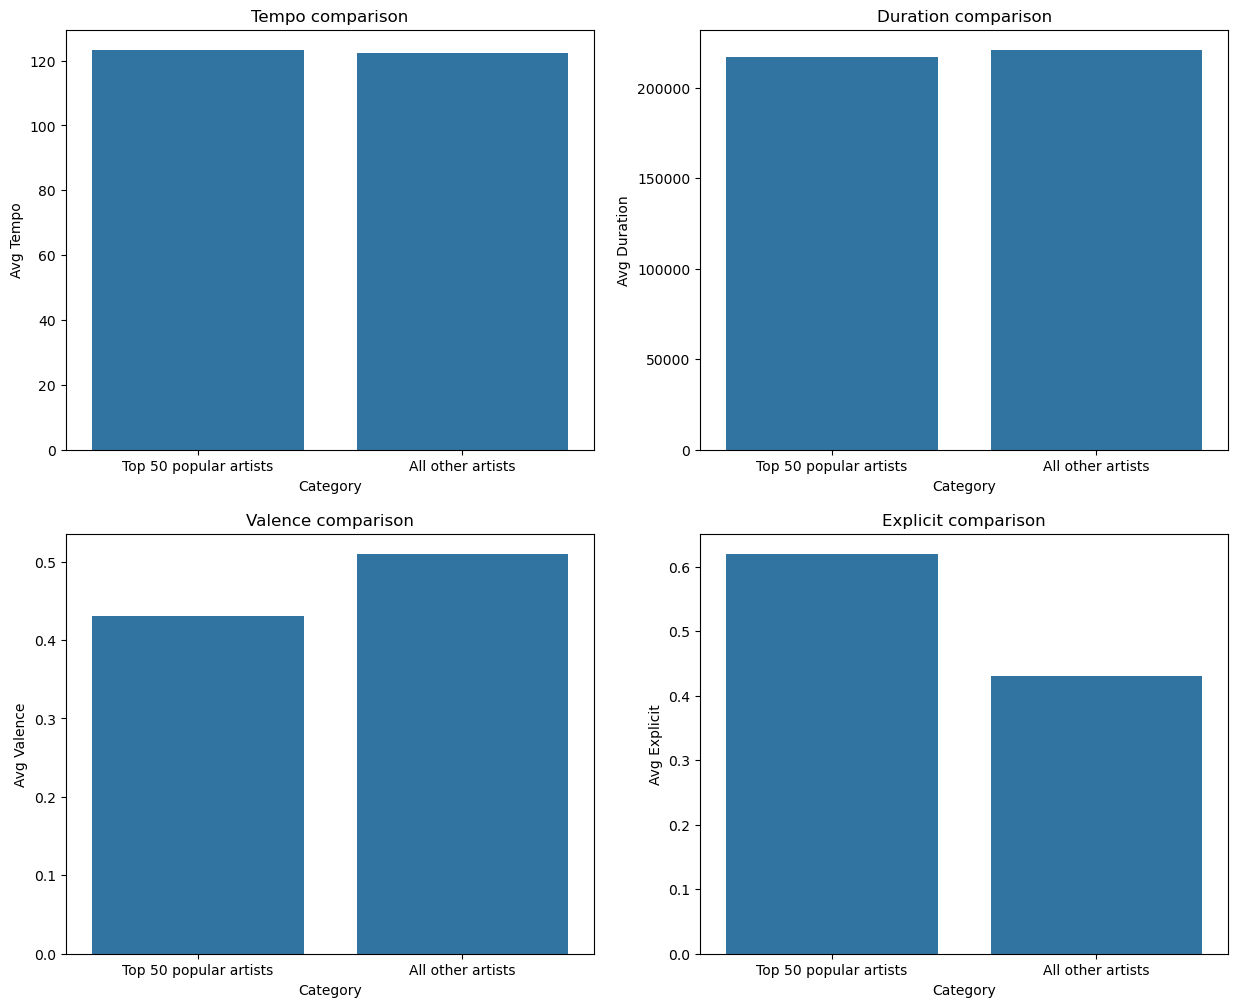

In [933]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.barplot(data=plot_data, x='Category', y='Avg Tempo', ax= axes[0,0])
sns.barplot(data=plot_data, x='Category', y='Avg Duration', ax= axes[0,1])
sns.barplot(data=plot_data, x='Category', y='Avg Valence', ax= axes[1,0])
sns.barplot(data=plot_data, x='Category', y='Avg Explicit', ax= axes[1,1])

axes[0,0].set_title('Tempo comparison')
axes[0,1].set_title('Duration comparison')
axes[1,0].set_title('Valence comparison')
axes[1,1].set_title('Explicit comparison')
plt.show()

The top 50 most popular artists on Spotify are on average making songs that are: 
- Slightly faster than the average of the other artists
- Slightly shorter than the average of the other artists
- Significantly lower valence than the average of other artists
- A lot more explicit songs than the averge of other artists

So again, the same behaviour can be seen here. The artists that currently are the most popular on Spotify make faster, shorter, sader/more melancholy songs and include more explicit content compared to the average other artist. 

# Presentation 
- Below is my presenation in and article.
- To see how I cleaned, transformed, analyzed and arrived at my findings, look above. 

# The quick fix - Music evolution mirroring society's evolution 

### We always hear that in today's world people have shorter attention spans, they crave quick fixes and the impressions and input is constant. 
### Music, as we know, is a mirror of society, and if that is the case, the music that is being produced should support that statement. 
### This article examines trends in Billboard charted songs from 2000 to 2025, using music data, it explores how these changes reflect shifts in music and society as a whole.
### Have we really become a quick fix society? The music industry tells us YES. 

Text(0.5, 1.0, 'songs with explicit content')

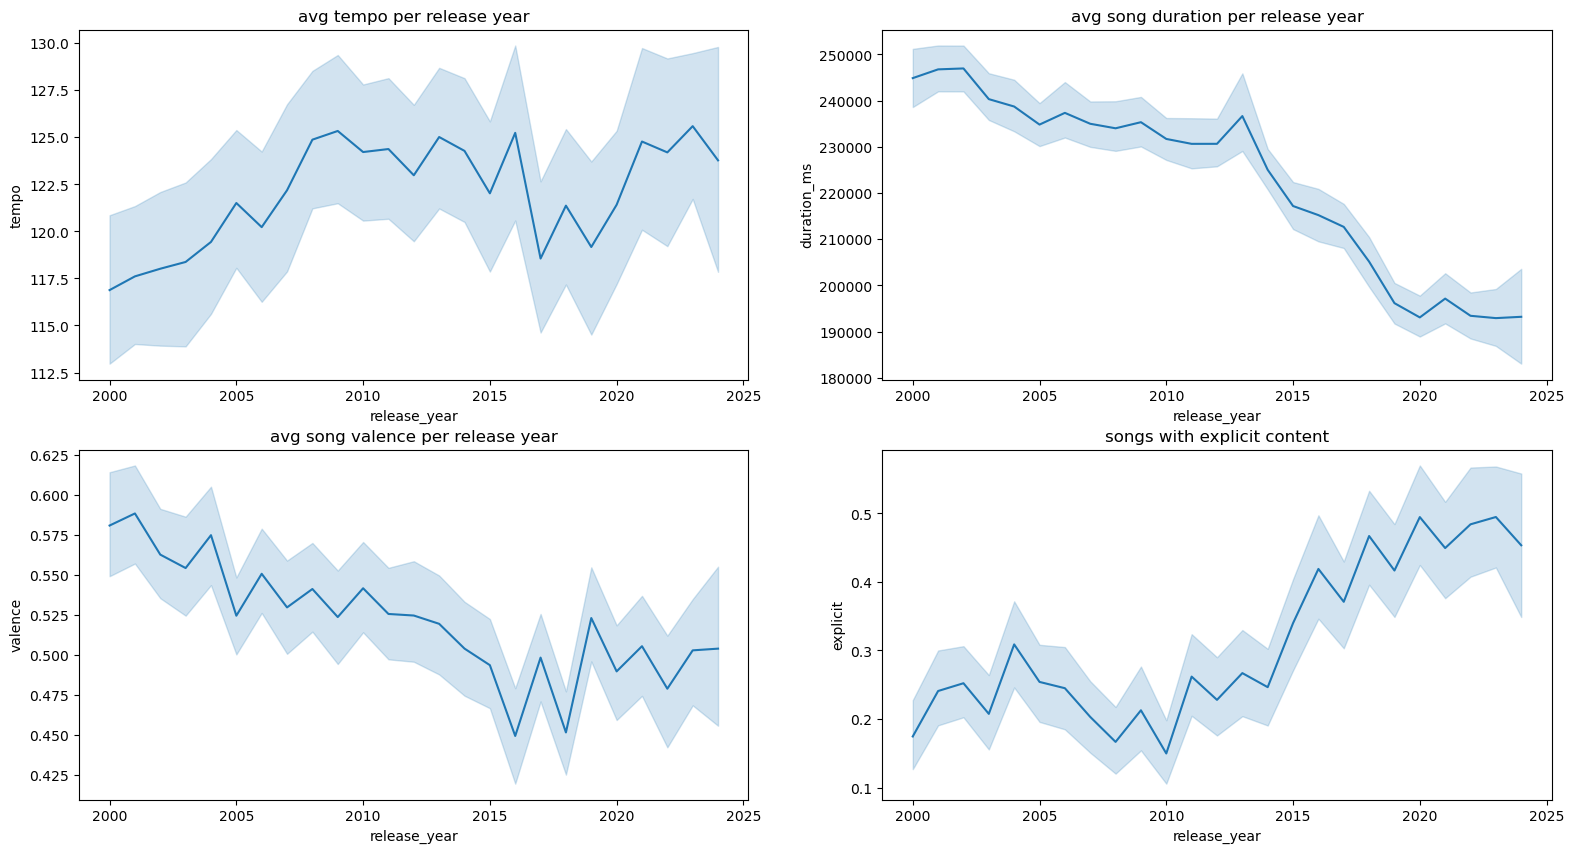

In [934]:
fig, axes = plt.subplots(2,2, figsize = (19,10))
sns.lineplot(data=popular_tracks_2000, x='release_year', y='tempo', ax=axes[0,0],)
sns.lineplot(data=popular_tracks_2000, x='release_year', y='duration_ms', ax=axes[0,1])
sns.lineplot(data=popular_tracks_2000, x='release_year', y='valence', ax=axes[1,0])
sns.lineplot(data=popular_tracks_2000, x='release_year', y='explicit', ax=axes[1,1])

axes[0,0].set_title('avg tempo per release year')
axes[0,1].set_title('avg song duration per release year')
axes[1,0].set_title('avg song valence per release year')
axes[1,1].set_title('songs with explicit content')

#### Music behaviour has changed. Above we see audio features of popular chart songs, by year, released between 2000 and 2025. 
#### These are songs that have spent at least 10 weeks on the charts at any point. 
#### When looking at the makeup of these songs by year, shorter songs with higher tempo is being released. Likely catering to the landscape of social media and content creation. Gone are the days of an 8 minute Bohemian Rapsody. 
#### As society from 2000 to 2025 gradually shifts to a digital world, a harsher world, a faster pace, with constant input and feedback loops and short attention spans, so does the music.
#### The trends in the audio features of the popular songs released during this time follows the same pattern. 
#### People need songs that can be used in a TikTok or a reel, and that most likely play into the behaviour we see in the plots. 
#### This also supports the claim that people crave quick fixes and are growing more and more impatient. We don't want to wait for a slow developing track. 
#### Society has also gradually become less restrictive about explicit content over this period, which again is evident when looking at the released music. Possibly because popular social media platforms have become less regulated, and because explicit content is more easily accessible now than ever. As already stated, music is a mirror of society. 
#### The avg valence of songs from 2015 and onwards is much lower than the start of the millenium. Are the quick fix society becoming more sad and melancholic? Do we crave more emotional complexity? Since music is a mirror of society, signs point towards yes. 
* find this analysis under "Analysis - Part 1"

## The most popular song

#### Let us look at the most popular song, Blinding Lights, by The Weekend. Which spent 90 weeks on the charts and averaged a chart position of less than 12th position during that time. 
#### Can we see the same tendencies there? 

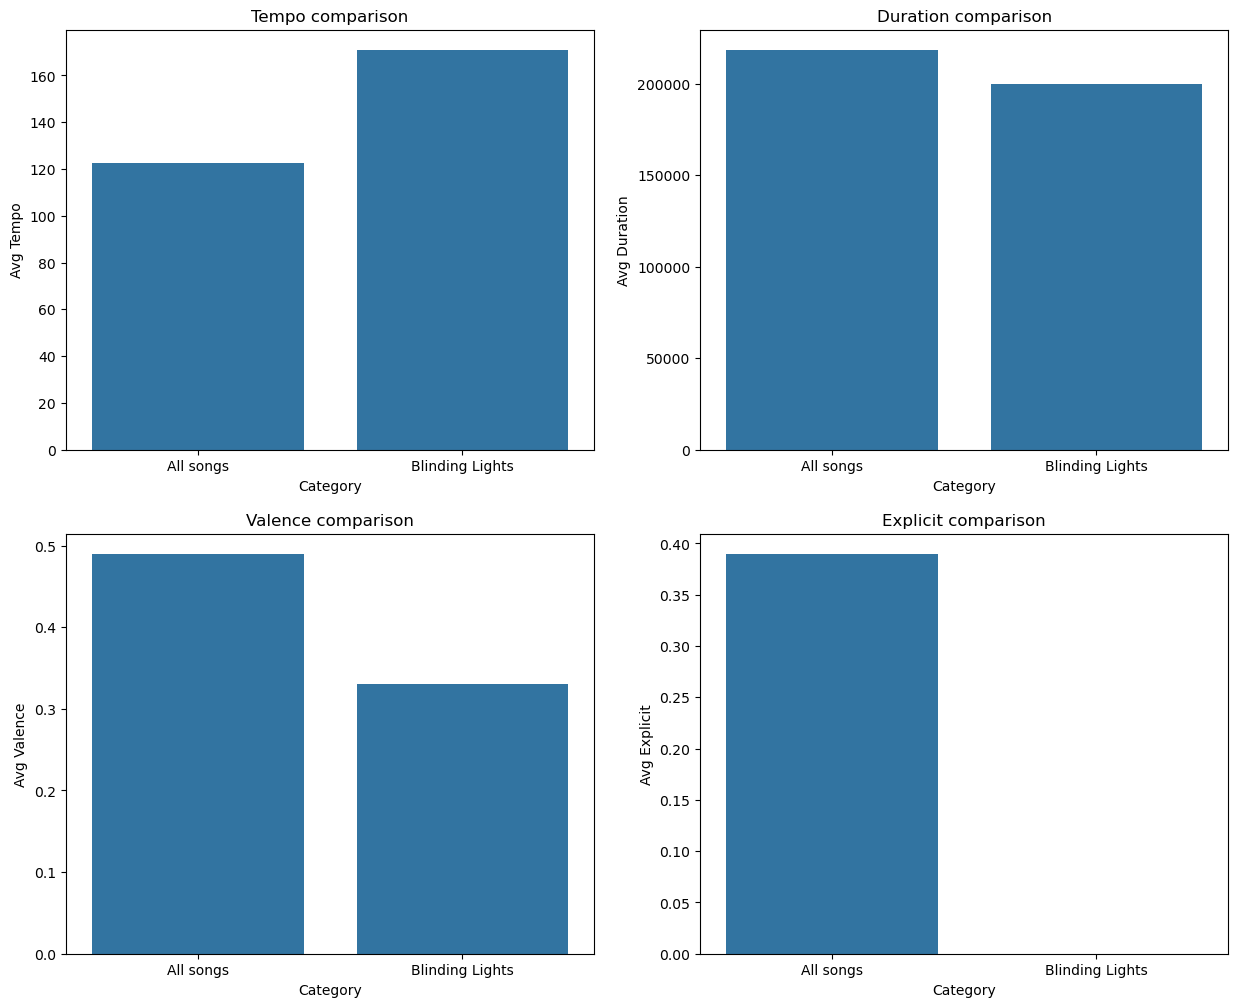

In [935]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.barplot(data=chart_data, x='Category', y='Avg Tempo', ax= axes[0,0])
sns.barplot(data=chart_data, x='Category', y='Avg Duration', ax= axes[0,1])
sns.barplot(data=chart_data, x='Category', y='Avg Valence', ax= axes[1,0])
sns.barplot(data=chart_data, x='Category', y='Avg Explicit', ax= axes[1,1])

axes[0,0].set_title('Tempo comparison')
axes[0,1].set_title('Duration comparison')
axes[1,0].set_title('Valence comparison')
axes[1,1].set_title('Explicit comparison')
plt.show()

#### We saw in earlier analysis that popular songs, just like the modern world, are becoming faster and faster during the last 25 years.
#### The popular songs are also becoming shorter and shorter, just like people's attention spans. 
#### The valence is getting lower and lower and the explicit content is increasing. 

#### To me it is therefore not a surprise to look at these plots. 
- Blinding Lights has a way higher tempo at 171 BPM than the avg of all songs. In fact it is much higher than any of the yearly averages we looked at in my previous plots. 
- The song is also significantly shorter than the avg song, and shorter than the majority of yearly averages we looked at earlier. 
- The valence is also much lower at 0.33 than the avg of all songs, and any of the yearly averages for popular songs we looked at previously.
- It is not however deemed to be explicit, which as pointed to previously, is also increasing amongst popular songs on a yearly basis.

#### So on average popular songs are getting faster, shorter and a lesser valence score over time, from 2000 to 2025. The most popular song out of them all, Blinding Lights released in 2020, is hammering that point home. Being super fast, shorter than average and has a very very low valence.
#### Important to remember is that valence is not a measure of the lyrical meaning, rather how happy or cheerful the tracks sounds. 

 * find this analysis under "Analysis - Part 2"


## The most popular artists 

#### Let's look at the most popular artists based on Spotify's popularity score. 
#### Do they strengthen our thesis? 

Text(0.5, 1.0, 'Weeks on chart vs Valence')

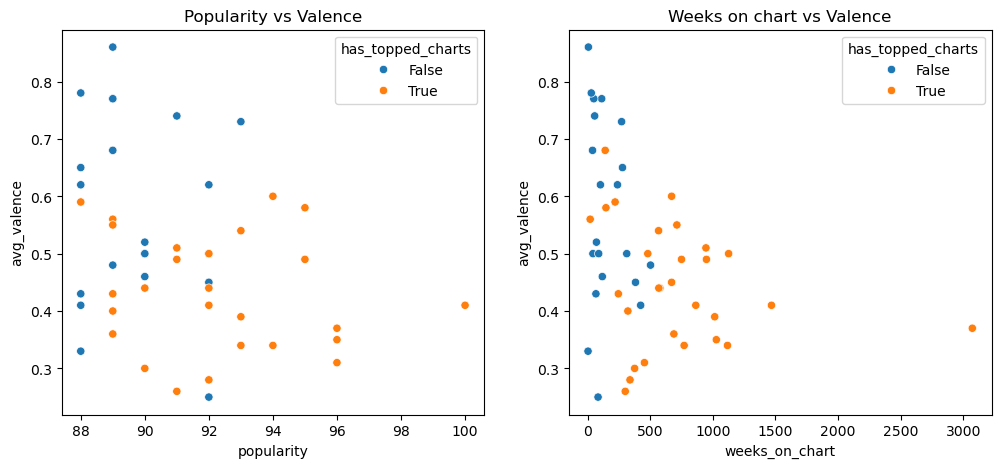

In [936]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.scatterplot(data=top_50_grouped, x='popularity', y='avg_valence', hue='has_topped_charts', ax=axes[0])
sns.scatterplot(data=top_50_grouped, x='weeks_on_chart', y='avg_valence', hue='has_topped_charts', ax=axes[1])

axes[0].set_title('Popularity vs Valence')
axes[1].set_title('Weeks on chart vs Valence')

#### Average valence shows a moderate negative correlation with both popularity and weeks on chart, suggesting that more successful and popular artists tend to release music with lower overall positivity.
#### The relationship is moderate, but it does mean that decreased valence is associated with success.
#### We also see in the hue (the orange dots) that the artists that have topped the charts at some point on average lean towards the lower side of the valence scale. 
#### So artists that become popular with the public are creating music that reflects modern society. 

* find this analysis under "Analysis - Part 3"

#### Now let's look at the songs created by the 50 most popular artists, compared to the rest. 

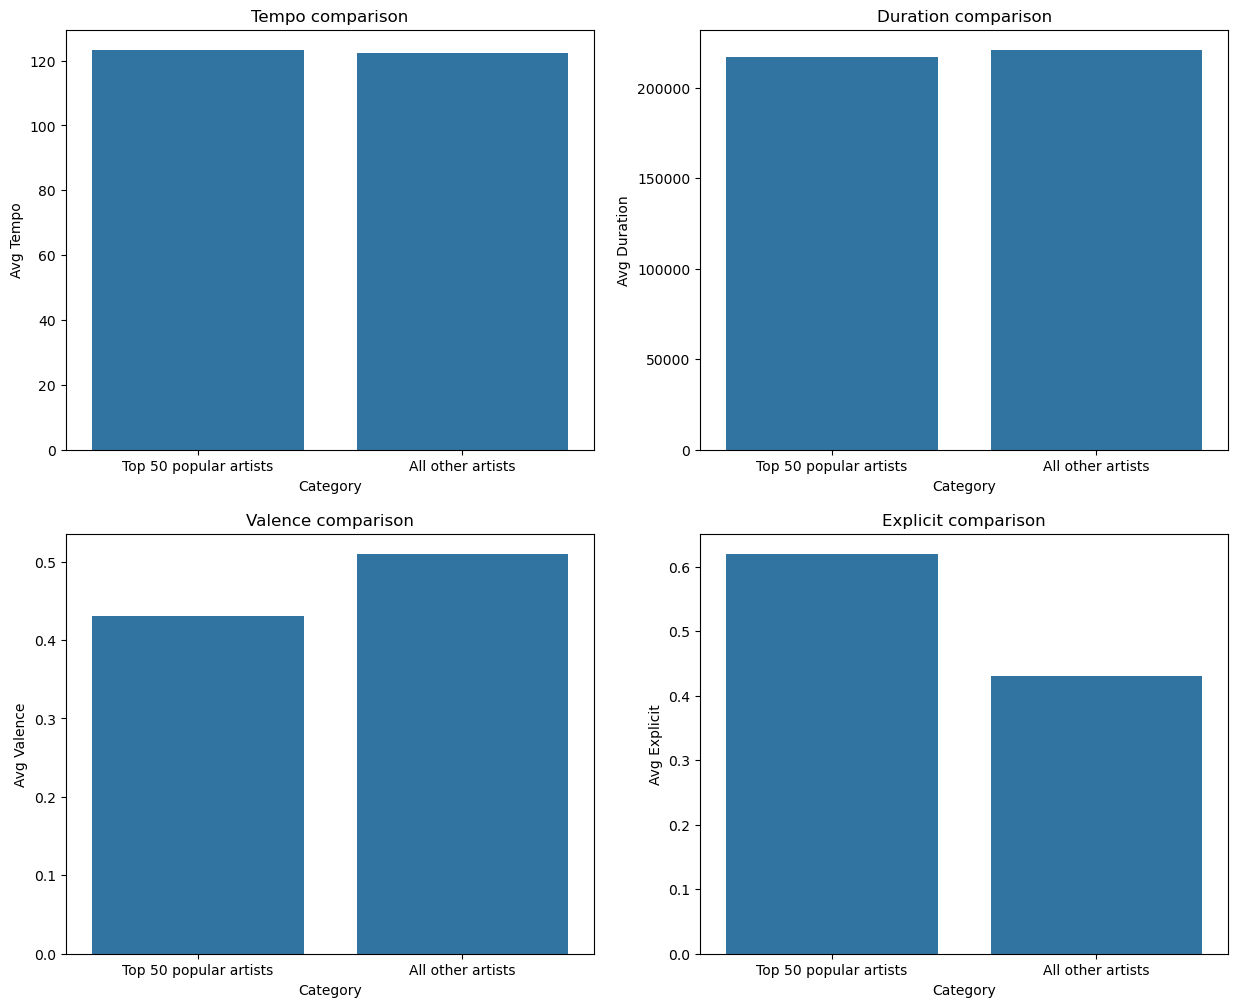

In [941]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.barplot(data=plot_data, x='Category', y='Avg Tempo', ax= axes[0,0])
sns.barplot(data=plot_data, x='Category', y='Avg Duration', ax= axes[0,1])
sns.barplot(data=plot_data, x='Category', y='Avg Valence', ax= axes[1,0])
sns.barplot(data=plot_data, x='Category', y='Avg Explicit', ax= axes[1,1])

axes[0,0].set_title('Tempo comparison')
axes[0,1].set_title('Duration comparison')
axes[1,0].set_title('Valence comparison')
axes[1,1].set_title('Explicit comparison')
plt.show()

#### The top 50 most popular artists on Spotify are on average making songs that are:

- Slightly faster than the average of the other artists
- Slightly shorter than the average of the other artists
- Significantly lower valence than the average of other artists
- A lot more explicit songs than the averge of other artists
#### So again, the same behaviour can be seen here. The artists that currently are the most popular on Spotify make faster, shorter, sader/more melancholy songs and include more explicit content compared to the average other artist. Reflecting a world that, like their music, has become faster paced, shorter in terms of things like attention and patience and more harsh. 

* find this analysis under "Analysis - Part 4"

## In summary 

#### Over the last 25 years, music has changed in ways that closely mirror changes in society. Songs have gradually become shorter and faster, a quick fix, which fits a society that have graduated towards having less time, moving at a faster pace and having shorter attention spans and patience. 
#### Music has evolved towards having less and less valence and more and more explicit content. Reflecting a world shaped by digital platforms, where we are more easily subject to the harsh brutalities and realities. 
#### Music is a mirror of society, and looking at the first quarter of this century it tells an interesting story about how we have changed. Let's wait and see what the next 25 years of music tell us about our selves. 

### Feedback

In the analysis part 1, Its a little hard to go through each audio feature in every graph one by one, could have been displayed as a line plot in one graph just like you did for popular_tracks_2000.
Interesting insights. Seems like a lot of data cleaning and ending up with a good catch.